> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

In [ ]:
getwd()

In [ ]:
setwd("/home/coco/Dropbox/Scribbling/posts")

# import

In [1]:
############## package
library(forecast) #ses
library(data.table)
library(ggplot2)
library(lmtest) #dwtest
library(TTR) #SMA
library(lubridate)
library(gridExtra)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# CH03

# 1

중간재출하지수 자료를 이용하여, 초기 평활값 $S_0^{(1)} = 15$를 사용하여 $ω = 0.6$와 $ω = 0.2$의 각
경우에 1-시차 후 예측값 $Z_{t−1}^{(1)}, t = 2, 3, 99, 100$을 계산하여라.


In [90]:
z <- scan("mindex.txt")
mindex <- ts(z, start = c(1986, 1), frequency = 12)
mindex

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,9.3,10.7,13.3,14.1,17.8,18.1,19.4,18.8,19.1,18.4,18.0,17.0
1987,19.5,20.1,19.4,15.7,15.6,16.1,14.9,16.0,14.6,18.3,18.2,23.0
1988,22.2,22.1,18.8,17.7,13.8,12.7,16.5,15.6,16.3,10.7,10.4,7.0
1989,4.7,4.5,4.0,6.0,6.2,5.7,4.4,4.2,5.0,5.8,6.4,4.9
1990,7.9,8.2,11.8,10.0,11.1,11.7,12.4,15.2,14.0,15.2,12.9,18.0
1991,14.4,12.7,8.3,11.5,11.9,11.6,10.3,8.5,11.6,12.3,14.5,11.1
1992,11.8,12.4,12.7,9.8,10.0,10.2,9.6,6.9,5.3,4.8,4.6,1.9
1993,3.8,4.7,7.7,7.0,7.2,7.8,8.6,11.4,10.7,11.8,11.3,16.0
1994,13.2,12.0,8.5,11.4,,,,,,,,


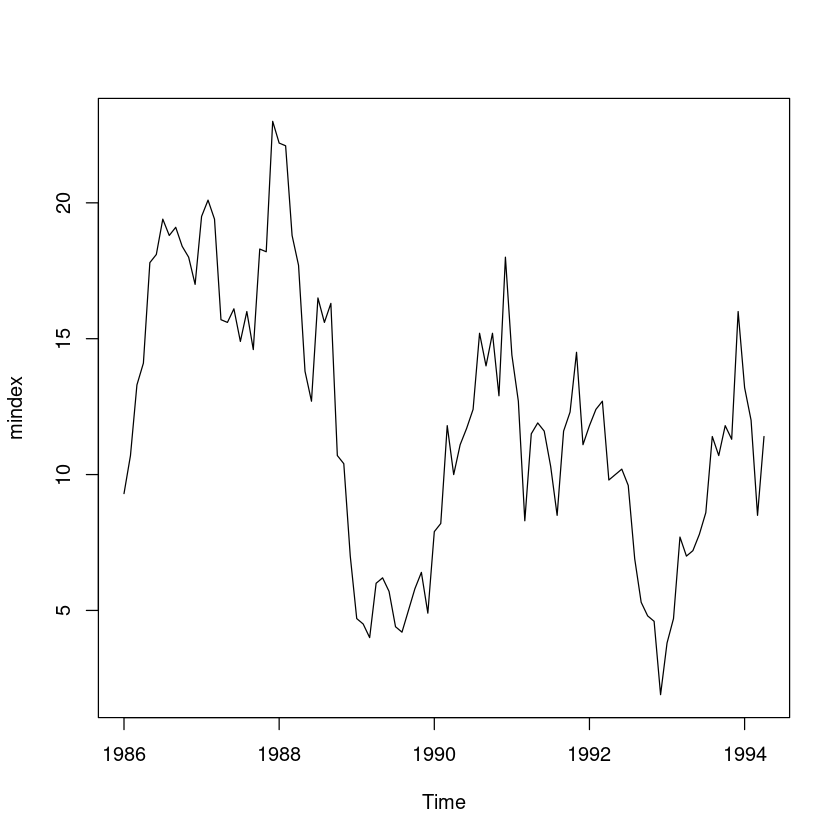

In [27]:
plot(mindex)

- 추세도 없고 계절성분도 없으니 단순지수평활을 한다.

모형 단순지수평활법 사용 $Z_t = \beta_{0,t} + \epsilon_t$

예측 $\hat Z_n(l) = w Z_n + (1-w) \hat Z_{n-1}(l)$

`-`

초기 예측값 $Z_1^{(1)}$은 초기 평활값 $S_0^{(1)}$를 사용하여 계산

$Z_1^{(1)} = S_0^{(1)}=15$

`-` w= 0.2

In [76]:
fit0 <- HoltWinters(mindex,
                    alpha = 0.2,
                    beta = FALSE,
                    gamma = FALSE,
                    l.start = 15)


In [140]:
fit0

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = mindex, alpha = 0.2, beta = FALSE, gamma = FALSE,     l.start = 15.1875)

Smoothing parameters:
 alpha: 0.2
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 10.97935

In [77]:
head(cbind(fit0$fitted, mindex))

,fit0$fitted.xhat,fit0$fitted.level,mindex
Jan 1986,NA,NA,9.3
Feb 1986,15.00000,15.00000,10.7
Mar 1986,14.14000,14.14000,13.3
Apr 1986,13.97200,13.97200,14.1
May 1986,13.99760,13.99760,17.8
Jun 1986,14.75808,14.75808,18.1


- t=2

$S_2^{(1)} = wZ_2 + (1-w)S_0^{(1)}$

In [78]:
0.2 * 10.7 + 0.8 * 15

[1] 14.14

$S_3^{(1)} = w  Z_3 + w  (1-w)  Z_2 + (1-w)^2 S_0^{(1)}$

In [79]:
0.2 * 13.3 + 0.2 * 0.8 * 10.7 + 0.8 * 0.8 * 15

[1] 13.972

In [42]:
tail(cbind(fit0$fitted, mindex))

,fit0$fitted.xhat,fit0$fitted.level,mindex
Nov 1993,9.156768,9.156768,11.3
Dec 1993,9.585414,9.585414,16.0
Jan 1994,10.868331,10.868331,13.2
Feb 1994,11.334665,11.334665,12.0
Mar 1994,11.467732,11.467732,8.5
Apr 1994,10.874186,10.874186,11.4


$S_{99}^{(1)} = w  Z_{99} + w  (1-w)  Z_{98} + \dots +  (1-w)^{100} S_0^{(1)}$

`-` 예측 갱신

$$S_n^{(1)} = wZ_n + (1-w)S_{n-1}^{(1)}$$

$S_{100}^{(1)} = w Z_{100} + (1-w) S_{(99)}^{(1)}$

In [143]:
0.2 * 11.4 + 0.8 * 10.874186

[1] 10.97935

$S_{99}^{(1)} = w Z_{99} + (1-w) S_{(98)}^{(1)}$

In [144]:
0.2 * 8.5 + 0.8 * 11.467732

[1] 10.87419

---

`-` w = 0.6

In [145]:
fit1 <- HoltWinters(mindex,
                    alpha = 0.6,
                    beta = FALSE,
                    gamma = FALSE,
                    l.start = 15)


In [152]:
fit1

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = mindex, alpha = 0.6, beta = FALSE, gamma = FALSE,     l.start = 15)

Smoothing parameters:
 alpha: 0.6
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 10.90021

In [146]:
head(cbind(fit1$fitted, mindex))

,fit1$fitted.xhat,fit1$fitted.level,mindex
Jan 1986,NA,NA,9.3
Feb 1986,15.00000,15.00000,10.7
Mar 1986,12.42000,12.42000,13.3
Apr 1986,12.94800,12.94800,14.1
May 1986,13.63920,13.63920,17.8
Jun 1986,16.13568,16.13568,18.1


- t=2

$S_2^{(1)} = wZ_2 + (1-w)S_0^{(1)}$

In [147]:
0.6 * 10.7 + 0.4 * 15

[1] 12.42

$S_3^{(1)} = w  Z_3 + w  (1-w)  Z_2 + (1-w)^2 S_0^{(1)}$

In [148]:
0.6 * 13.3 + 0.6*0.4*10.7 + 0.4*0.4*15

[1] 12.948

In [149]:
tail(cbind(fit1$fitted, mindex))

,fit1$fitted.xhat,fit1$fitted.level,mindex
Nov 1993,11.26423,11.26423,11.3
Dec 1993,11.28569,11.28569,16.0
Jan 1994,14.11428,14.11428,13.2
Feb 1994,13.56571,13.56571,12.0
Mar 1994,12.62628,12.62628,8.5
Apr 1994,10.15051,10.15051,11.4


$S_{99}^{(1)} = w  Z_{99} + w  (1-w)  Z_{98} + \dots +  (1-w)^{100} S_0^{(1)}$

`-` 예측 갱신

$$S_n^{(1)} = wZ_n + (1-w)S_{n-1}^{(1)}$$

$S_{100}^{(1)} = w Z_{100} + (1-w) S_{(99)}^{(1)}$

In [150]:
0.6*11.4+0.4*10.15051

[1] 10.9002

$S_{99}^{(1)} = w Z_{99} + (1-w) S_{(98)}^{(1)}$

In [151]:
0.6*8.5+0.4*12.62628

[1] 10.15051

--- 

# 2 (예측오차분석을 안했다.;;)

(R 실습) 다음의 각 자료에 대해 적절한 평활법을 적용한 후 , 예측오차 분석을 하여 적용한
평활법이 적절했는지 논하여라. 그리고 (2)번의 경우 첫번째 과제 5,6번에서 적합한 모형과 1-시차
후 예측 오차의 제곱합 (SSE) 기준하에서 예측력을 비교하여라.


## (1)

‘female.txt’ : 월별 전문기술행정직에 종사하는 여성근로자 수 (단위:명)

In [347]:
female <- scan("female.txt")

In [348]:
fema <- ts(female, start=c(1981,1), frequency=12)

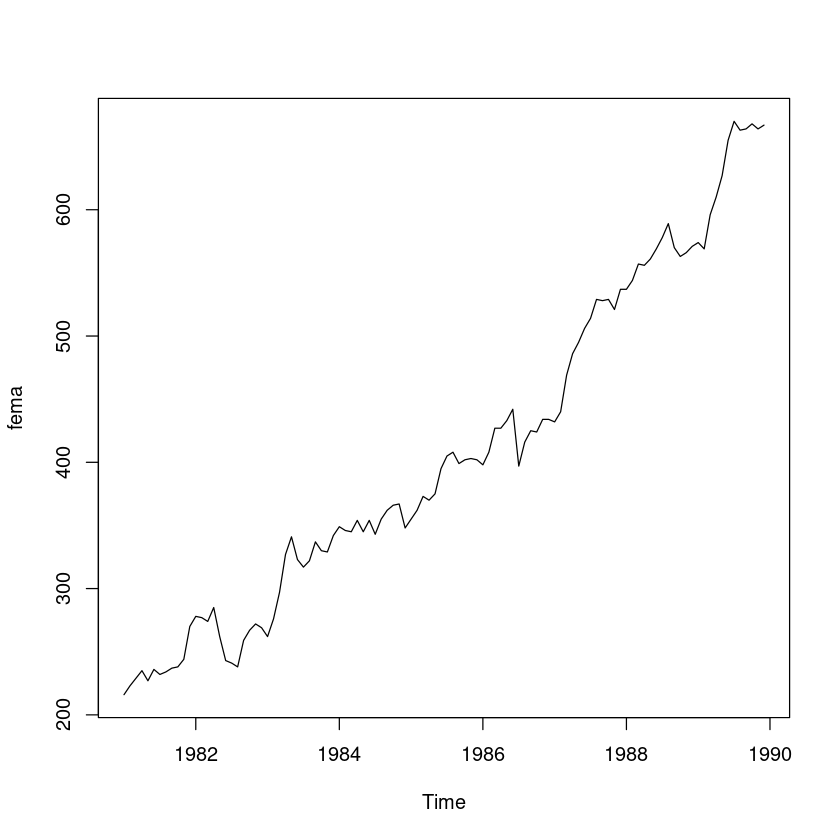

In [349]:
plot(fema)

- 시도표를 확인해보니 추세성분과 불규칙성분으로 이루어져 있다. ---> 이중지수평활을 사용한다.

`-` 1모수 이중지수 평활

In [374]:
w <- c(seq(0.1, 0.8, 0.1), seq(0.81, 0.99, 0.01))

In [382]:
df <- data.frame(alpha = numeric(length(w)), beta = numeric(length(w)), sse = numeric(length(w)))
for (i in 1:length(w)) {
  alpha <- w[i]
  beta <- w[i]
  fit <- HoltWinters(fema, alpha = alpha, beta = beta, gamma = FALSE)
  sse <- fit$SSE
  df[i, ] <- c(alpha, beta, sse)
}

In [383]:
df

alpha,beta,sse
<dbl>,<dbl>,<dbl>
0.10,0.10,47737.16
0.20,0.20,39413.25
0.30,0.30,32655.02
0.40,0.40,28136.56
0.50,0.50,23964.31
0.60,0.60,21390.42
0.70,0.70,20179.01
0.80,0.80,19991.82
0.81,0.81,20034.76


1모수 이중지수일때는 $\alpha=\beta=0.8$일 때, SSE값이 19991.82 값을 가진다.

`-` 이중지수평활 추정

In [384]:
fit_fema <- HoltWinters(fema, gamma=FALSE)

In [385]:
fit_fema

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = fema, gamma = FALSE)

Smoothing parameters:
 alpha: 1
 beta : 0.01666631
 gamma: FALSE

Coefficients:
        [,1]
a 667.000000
b   5.145043

In [386]:
predict(fit_fema, n.ahead=12, prediction.interval = T, level=0.95) 

,fit,upr,lwr
Jan 1990,672.1450,694.8066,649.4835
Feb 1990,677.2901,709.6065,644.9736
Mar 1990,682.4351,722.3438,642.5264
Apr 1990,687.5802,734.0440,641.1163
May 1990,692.7252,745.1007,640.3498
Jun 1990,697.8703,755.7139,640.0266
Jul 1990,703.0153,766.0016,640.0290
Aug 1990,708.1603,776.0399,640.2807
Sep 1990,713.3054,785.8813,640.7295
Oct 1990,718.4504,795.5635,641.3374


In [387]:
fit_fema$SSE

[1] 14153.81

---

`-` 단순지수평활법 적합

In [395]:
fit_fema2 <- HoltWinters(fema, beta=FALSE, gamma=FALSE)
fit_fema2
fit_fema2$SSE

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = fema, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9999225
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 666.9998

[1] 15579.5

---

`-` 계절지수평활법 적합

In [397]:
fit_fema3 <- HoltWinters(fema, seasonal="additive")
fit_fema3
fit_fema3$SSE

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = fema, seasonal = "additive")

Smoothing parameters:
 alpha: 0.5689925
 beta : 0.01533418
 gamma: 1

Coefficients:
          [,1]
a   677.319852
b     4.462732
s1  -10.805353
s2  -10.907550
s3   13.687188
s4   21.650246
s5   29.187883
s6   39.477663
s7   33.205948
s8   19.062994
s9    5.235871
s10  -3.290505
s11 -11.437139
s12 -10.319852

[1] 25835.54

## (2)

‘export.txt’ ; 월별수출액(단위:억$)

In [49]:
export <- scan("export.txt")

In [50]:
expo <- ts(export, start=c(1981,1), frequency=12)

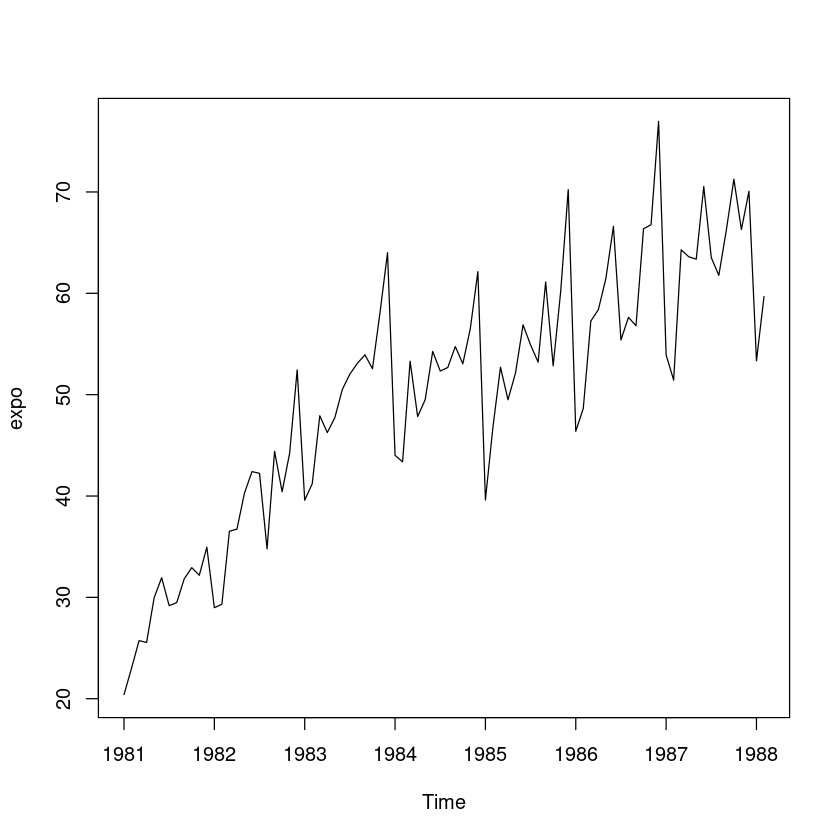

In [51]:
plot.ts(expo)

- 추세성분, 계절성분(주기12), 불규칙성분으로 구성되어 있다. --> 계절지수 평활을 이용하자!

`-` 가법모형

In [52]:
fit_expo_a <- HoltWinters(expo, seasonal="additive") #default는 additive
fit_expo_a

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = expo, seasonal = "additive")

Smoothing parameters:
 alpha: 0.3304767
 beta : 0.04369053
 gamma: 0.6102758

Coefficients:
           [,1]
a    66.9300146
b     0.3670945
s1   -0.9590061
s2   -2.3460160
s3   -1.4388022
s4    4.0020957
s5   -2.8546787
s6   -3.1036803
s7    0.4486017
s8    3.3118493
s9    1.6302355
s10   8.0731659
s11 -11.5480012
s12  -8.8892298

In [53]:
fit_expo_m <- HoltWinters(expo, seasonal="multiplicative")
fit_expo_m

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = expo, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.4285887
 beta : 0.02606259
 gamma: 0.4083356

Coefficients:
          [,1]
a   68.7136998
b    0.5141142
s1   0.9879869
s2   0.9620299
s3   0.9996946
s4   1.0834386
s5   0.9897148
s6   0.9744549
s7   1.0319339
s8   1.0425559
s9   1.0357445
s10  1.1286956
s11  0.8073858
s12  0.8400441

In [54]:
fit_expo_a$SSE

[1] 1135.422

In [55]:
fit_expo_m$SSE

[1] 1048.263

승법 모형의 SSE가 더 작으니 이 모형을 선택하자.

`-` 이중지수

In [56]:
fit_expo2<- HoltWinters(expo, gamma=FALSE )
fit_expo2$SSE

[1] 3338.933

In [57]:
fit_expo3<- HoltWinters(expo, beta=FALSE, gamma=FALSE )
fit_expo3$SSE

[1] 3311.573

### hw1_6

In [58]:
z <- scan("export.txt")
n <- length(z)
n

[1] 86

In [59]:
z_ts <- ts(z, frequency=12)
cycle(z_ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1,2,3,4,5,6,7,8,9,10,11,12
2,1,2,3,4,5,6,7,8,9,10,11,12
3,1,2,3,4,5,6,7,8,9,10,11,12
4,1,2,3,4,5,6,7,8,9,10,11,12
5,1,2,3,4,5,6,7,8,9,10,11,12
6,1,2,3,4,5,6,7,8,9,10,11,12
7,1,2,3,4,5,6,7,8,9,10,11,12
8,1,2,,,,,,,,,,


In [60]:
seasonal_I <- as.factor(cycle(z_ts))
t <- 1:n
m2 <- lm(z~t+seasonal_I)

In [61]:
summary(m2)


Call:
lm(formula = z ~ t + seasonal_I)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8562  -2.2938   0.1567   2.6730   9.3951 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.98000    1.73500  12.669  < 2e-16 ***
t             0.43721    0.01893  23.097  < 2e-16 ***
seasonal_I2   1.71779    2.16697   0.793 0.430512    
seasonal_I3   9.21741    2.24422   4.107 0.000103 ***
seasonal_I4   7.37163    2.24366   3.286 0.001566 ** 
seasonal_I5   9.30299    2.24326   4.147 8.98e-05 ***
seasonal_I6  12.96578    2.24302   5.780 1.72e-07 ***
seasonal_I7   9.16286    2.24294   4.085 0.000112 ***
seasonal_I8   7.73422    2.24302   3.448 0.000941 ***
seasonal_I9  11.07272    2.24326   4.936 4.88e-06 ***
seasonal_I10 10.68409    2.24366   4.762 9.47e-06 ***
seasonal_I11 12.37545    2.24422   5.514 5.03e-07 ***
seasonal_I12 18.57967    2.24494   8.276 4.26e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard

In [62]:
SSE <- sum(m2$residuals^2)
SSE

[1] 1371.057

> 과제 1에서 적합한 선형모델보다 평활법(계절지수, 가법_승법_)으로 적합한 모델의 SSE가 너 낮게 나왔다. 

# 3

 (R 실습) ‘data1.csv’는 모의 실험에 의해 생성된 시계열자료(t:시간, z:시계열자료)이다.다음 물음
에 답하여라.

In [411]:
data1 <- read.csv("data1.csv")
t <- data1$t
y <- data1$z
z <- cbind(x,y)
n <- length(data1$t)
data1_ <- ts(y, start=c(1981,1),frequency=12)
data1_

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1981,-1.5346871,2.6850469,-0.4288189,1.3724199,-0.9800884,2.4156505,0.1460579,1.9565546,0.3314012,0.1031952,4.5465702,3.3733991
1982,2.1320092,1.4610979,3.5995999,2.6229617,3.3260846,2.6279068,2.4061911,4.9681833,2.1537724,3.2376604,2.0848844,4.4146009
1983,5.5427871,3.5727733,3.6793795,1.0197987,4.1619256,3.9038326,2.1724542,4.9360919,4.8127781,4.6404884,4.4090738,3.3529045
1984,4.0967541,3.4881527,4.4249974,4.3210561,7.7103219,5.0907609,4.5999605,4.9773808,7.6107690,4.9986647,7.1678722,7.1542270
1985,6.6329637,2.8462231,9.3646617,4.4855729,5.2444451,5.8160173,5.0466196,9.5742821,9.0751720,6.6775546,6.7345322,5.7569890
1986,8.3008035,7.5701959,6.5050066,6.0962461,7.4245090,4.4973441,6.5920516,6.9026479,4.6123368,7.7952478,8.4416974,5.6684225
1987,8.5028659,8.8312543,6.9776594,7.0775957,8.4638087,10.7761422,9.4661818,8.7774843,8.9804188,7.1654550,9.5367387,8.8641697
1988,8.9645710,7.5418683,9.0336999,10.8611356,8.7190544,14.1133979,9.5868440,11.4598053,8.2142746,10.9960972,11.3776375,11.4480245
1989,12.5356509,8.8132146,9.1437447,10.2114895,,,,,,,,


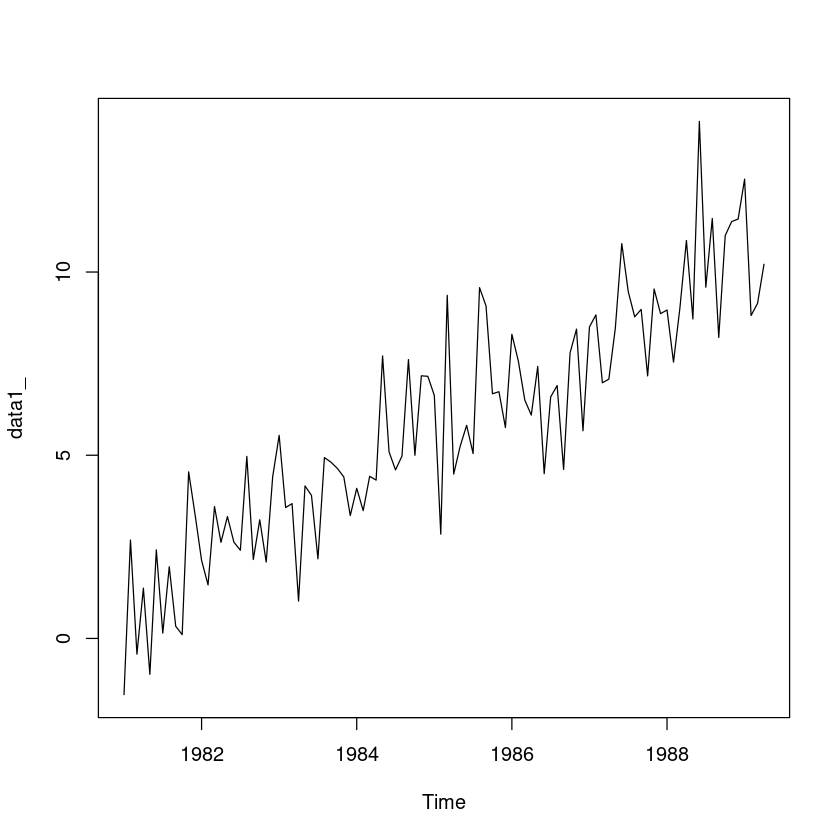

In [410]:
plot(data1_)

- 추세와 계절성분, 불규칙성이 있어보인다.

## (1) 교수님은 계절성분이 없고 추세만 있어 모형을 적합하였음

적절한 추세 모형을 적합시킨 후 잔차분석을 하여라.

계절추세모형
$$Z_t = \beta_0 + \beta_1 + \sum_{i=1}^l 2\delta_i \times I_{tl} + \epsilon_t$, 단 $\delta_1=0$$

In [412]:
cycle(data1_)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1981,1,2,3,4,5,6,7,8,9,10,11,12
1982,1,2,3,4,5,6,7,8,9,10,11,12
1983,1,2,3,4,5,6,7,8,9,10,11,12
1984,1,2,3,4,5,6,7,8,9,10,11,12
1985,1,2,3,4,5,6,7,8,9,10,11,12
1986,1,2,3,4,5,6,7,8,9,10,11,12
1987,1,2,3,4,5,6,7,8,9,10,11,12
1988,1,2,3,4,5,6,7,8,9,10,11,12
1989,1,2,3,4,,,,,,,,


In [420]:
seasonal_I <- as.factor(cycle(data1_))
#t <- 1:n
m2 <- lm(y~ 0+ t +seasonal_I)

In [421]:
summary(m2)


Call:
lm(formula = y ~ 0 + t + seasonal_I)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4526 -0.8739 -0.1227  0.8747  3.7703 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
t             0.09971    0.00507  19.667  < 2e-16 ***
seasonal_I1   1.24446    0.54646   2.277  0.02522 *  
seasonal_I2   0.21542    0.54878   0.393  0.69562    
seasonal_I3   0.72572    0.55115   1.317  0.19138    
seasonal_I4   0.15582    0.55354   0.282  0.77899    
seasonal_I5   0.82223    0.56859   1.446  0.15175    
seasonal_I6   1.36889    0.57074   2.398  0.01860 *  
seasonal_I7   0.11609    0.57292   0.203  0.83990    
seasonal_I8   1.70838    0.57513   2.970  0.00384 ** 
seasonal_I9   0.63848    0.57739   1.106  0.27185    
seasonal_I10  0.51670    0.57967   0.891  0.37519    
seasonal_I11  1.50257    0.58200   2.582  0.01150 *  
seasonal_I12  0.86957    0.58436   1.488  0.14035    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error

- 적합모형

$\hat Z_t = 0.09971 t     +1.24446 I_{t1} \dots +0.86957     I_{t12}$

`-` 잔차검정

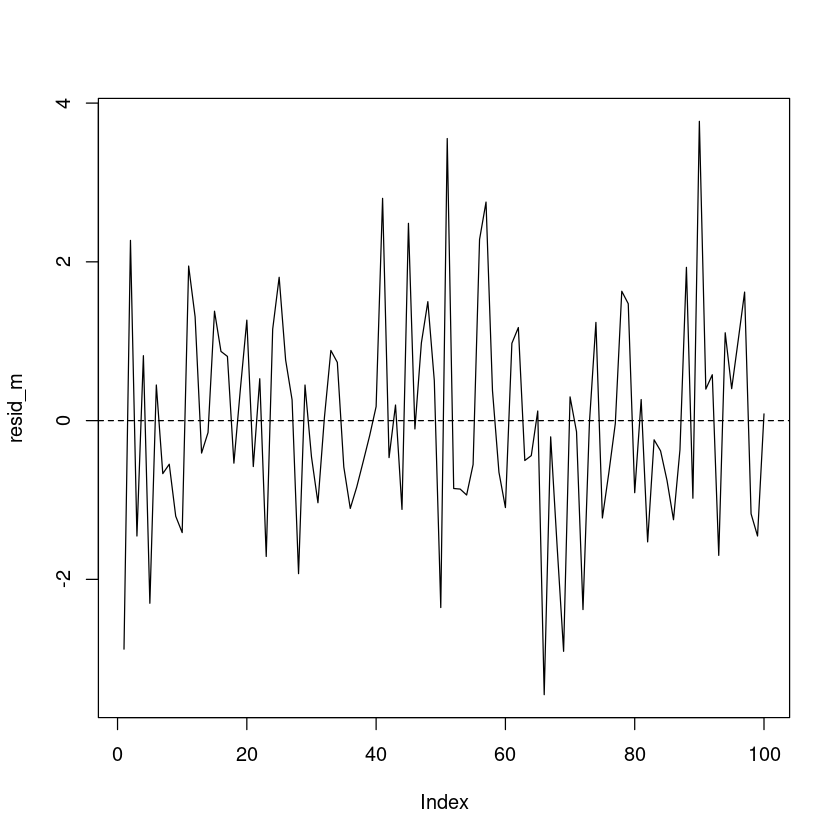

In [422]:
resid_m <- resid(m2)
plot(resid_m, pch=16, type='l')
abline(h=0, lty=2)

In [316]:
t.test(resid_m)


	One Sample t-test

data:  resid_m
t = 4.1891e-18, df = 99, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2716042  0.2716042
sample estimates:
   mean of x 
5.734074e-19 


In [425]:
bptest(m2)


	studentized Breusch-Pagan test

data:  m2
BP = 11.4, df = 12, p-value = 0.495


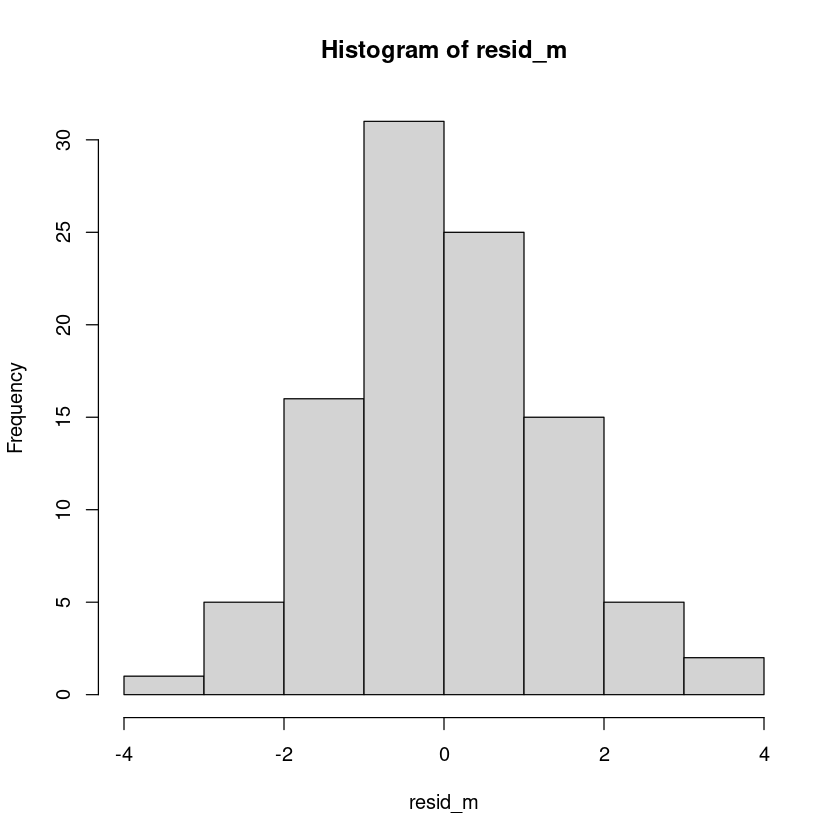

In [317]:
hist(resid_m)

In [426]:
shapiro.test(resid_m)


	Shapiro-Wilk normality test

data:  resid_m
W = 0.99218, p-value = 0.8338


In [428]:
dwtest(m2, alternative = "two.sided") 


	Durbin-Watson test

data:  m2
DW = 2.1153, p-value = 0.5919
alternative hypothesis: true autocorrelation is not 0


## (2)

 (1)에서 적합한 추세모형에서 1∼ 10 시차 후의 예측값을 구하여라.

In [429]:
new_dt <- data.frame( t = n + (1:10),
 seasonal_I = as.factor(c(5:12,1,2)))
new_dt

t,seasonal_I
<int>,<fct>
101,5
102,6
103,7
104,8
105,9
106,10
107,11
108,12
109,1


In [454]:
predict(m2, new_dt)

1        2        3        4        5        6        7        8 
10.89328 11.53965 10.38657 12.07858 11.10839 11.08632 12.17190 11.63862 
       9       10 
12.11322 11.18390

In [455]:
a <- predict(m2, new_dt)

## (3)

적절한 평활법을 적용한 후 잔차분석을 하여라.

- 시도표에서 등분산으로 보이니 가법모형 적용

In [439]:
fit_data_a <- HoltWinters(data1_, seasonal="additive")
fit_data_a


Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = data1_, seasonal = "additive")

Smoothing parameters:
 alpha: 0.1075626
 beta : 0.03407311
 gamma: 0.2315828

Coefficients:
           [,1]
a   11.19913122
b    0.10780161
s1  -0.07016081
s2   0.66130312
s3  -0.85496062
s4   0.47657925
s5  -0.88090464
s6  -0.76891779
s7   0.57746908
s8  -0.22134249
s9   0.45302226
s10 -1.33334803
s11 -0.44879394
s12 -0.72310382

In [441]:
ls(fit_data_a)

[1] "alpha"        "beta"         "call"         "coefficients" "fitted"      
[6] "gamma"        "seasonal"     "SSE"          "x"

In [442]:
fit_data_a$SSE

[1] 241.4043

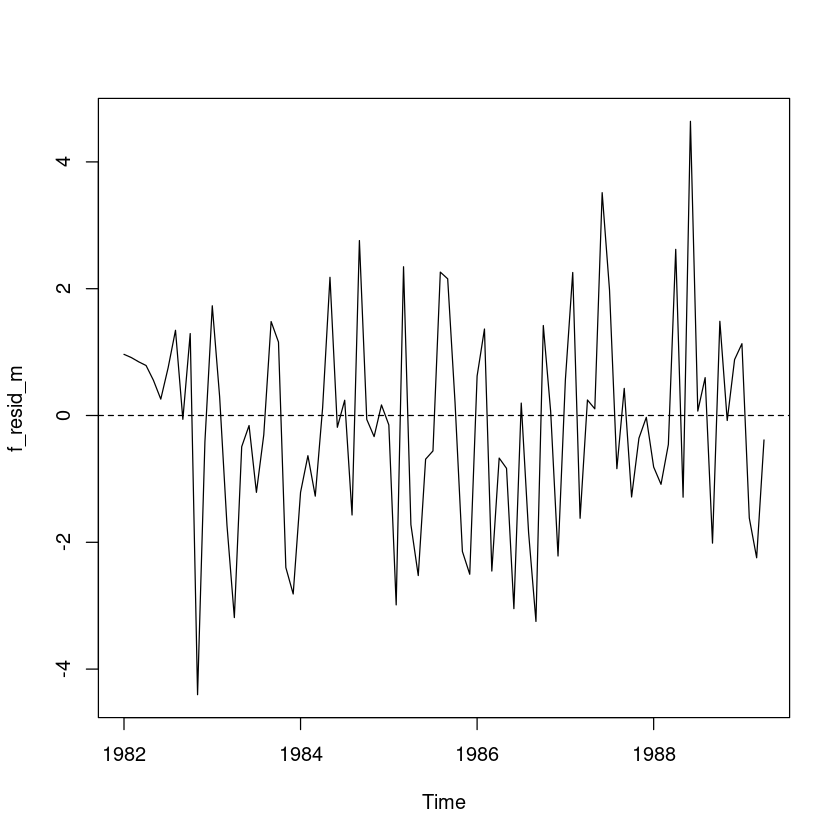

In [443]:
f_resid_m <- resid(fit_data_a)
plot(f_resid_m, pch=16, type='l')
abline(h=0, lty=2)

In [434]:
t.test(f_resid_m)


	One Sample t-test

data:  f_resid_m
t = -0.97545, df = 87, p-value = 0.332
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5232992  0.1787545
sample estimates:
 mean of x 
-0.1722723 


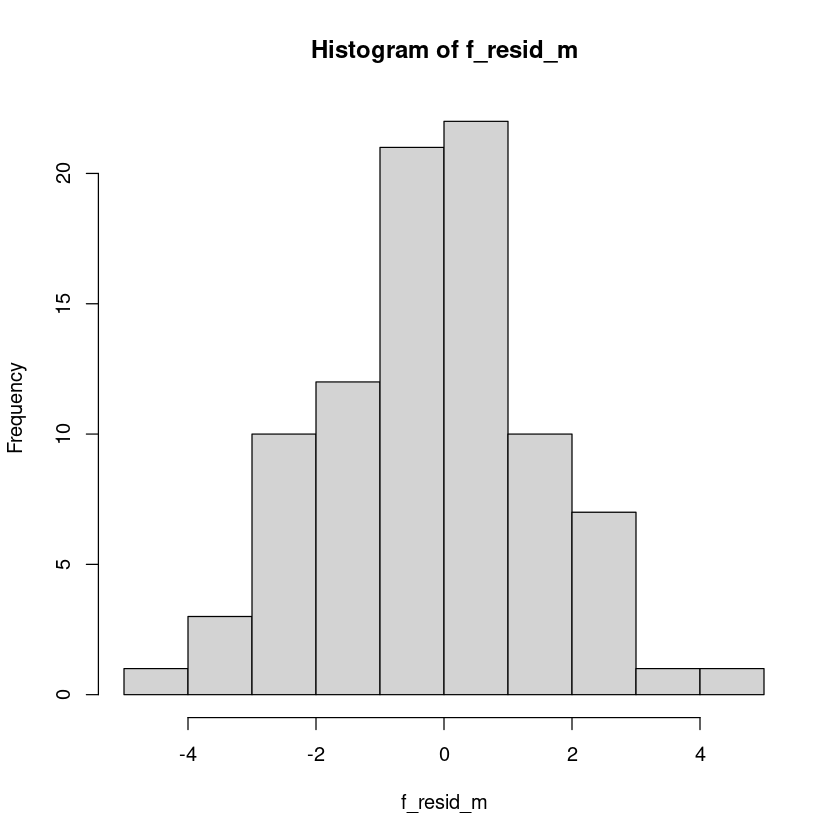

In [435]:
hist(f_resid_m)

In [437]:

shapiro.test(f_resid_m)


	Shapiro-Wilk normality test

data:  f_resid_m
W = 0.99387, p-value = 0.9586


## (4)

(3)의 결과를 이용하여 1∼10시차 후의 예측값을 구하여라.

In [483]:
predict(fit_data_a, n.ahead=10, prediction.interval = T, level=0.95)

,fit,upr,lwr
May 1989,11.23677,14.48390,7.989648
Jun 1989,12.07604,15.34319,8.808889
Jul 1989,10.66758,13.95596,7.379195
Aug 1989,12.10692,15.41775,8.796079
Sep 1989,10.85723,14.19177,7.522695
Oct 1989,11.07702,14.43652,7.717522
Nov 1989,12.53121,15.91695,9.145475
Dec 1989,11.84020,15.25346,8.426943
Jan 1990,12.62237,16.06444,9.180291
Feb 1990,10.94380,14.41600,7.471600


In [477]:
prediction_result <- predict(fit_data_a, n.ahead=10, prediction.interval = T, level=0.95)

In [486]:
b <- prediction_result[1:10]

## (5)

실제 1, 2, . . . , 10 시차 후의 관측값이 ‘data1 new.csv’일 때, (2), (4)의 결과를 이용하여 어느
모형이 더 적합했는지에 대해 비교하여라.

In [448]:
data1new <- read.csv("data1_new.csv")

In [459]:
sum((data1new$z - a)^2)

[1] 38.30278

In [487]:
sum((data1new$z - b)^2)

[1] 35.55532

(4)의 모형이 더 적합했다.

# CH04

# 4

 (R 실습) ‘export.txt’자료에 대하여 각가 다음 물음에 답하여라.


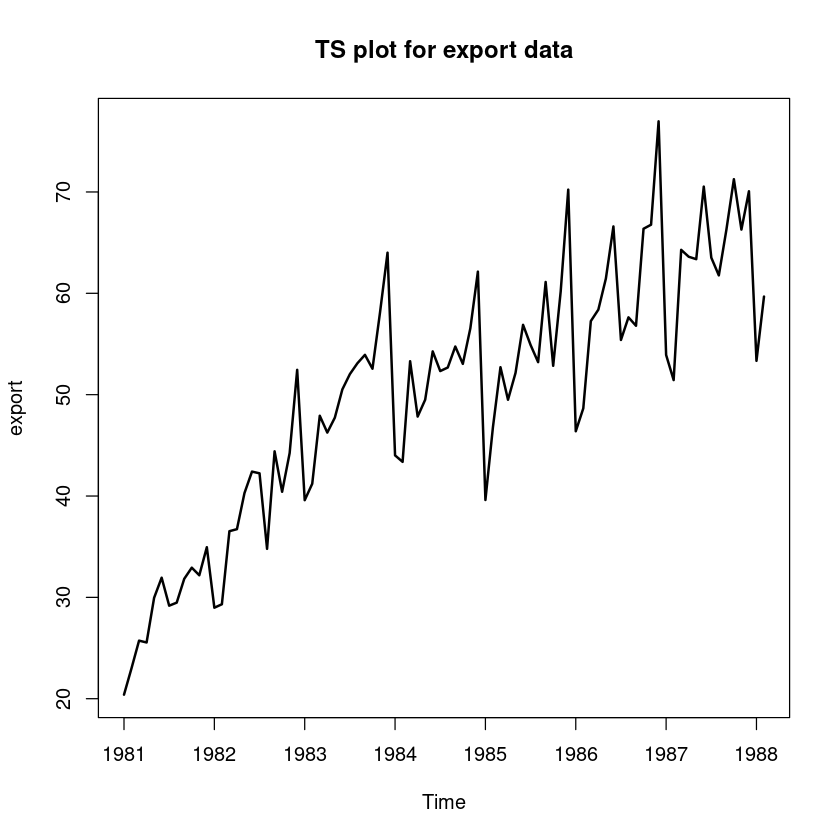

In [2]:
z <- scan("export.txt")
t <- 1:length(z)
export <- ts(z, start=c(1981,1), frequency=12)
plot.ts(export, lwd=2, main="TS plot for export data")

## (1)

추세분석을 이용한 분해법에 의한 각 성분의 시계열 그림을 그려라.

`-` 추세성분 추정: $Z_t = \beta_0 + \beta_1t + \epsilon_t$ 적합

In [14]:
fit0 <- lm(export  ~ t)
summary(fit0)


Call:
lm(formula = export ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1230  -4.0245  -0.6699   4.1819  17.3619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.62075    1.37454   22.28   <2e-16 ***
t            0.44520    0.02744   16.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.318 on 84 degrees of freedom
Multiple R-squared:  0.758,	Adjusted R-squared:  0.7552 
F-statistic: 263.2 on 1 and 84 DF,  p-value: < 2.2e-16


$\hat T_t = 30.621 + 0.445 t$

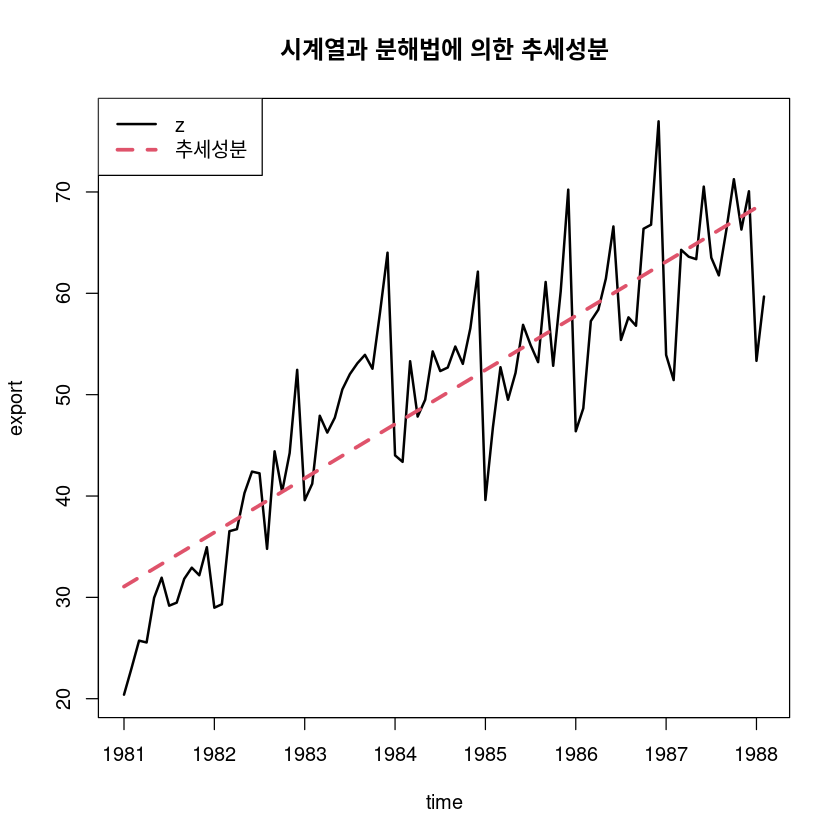

In [15]:
hat_Tt <- fitted(fit0)
ts.plot(export, hat_Tt,
     col=1:2,
     lty=1:2,
     lwd=2:3,
     ylab="export", xlab="time",
     main="시계열과 분해법에 의한 추세성분")
legend("topleft", lty=1:2, col=1:2, lwd=2:3, c("z", "추세성분"))

`-` 계절성분

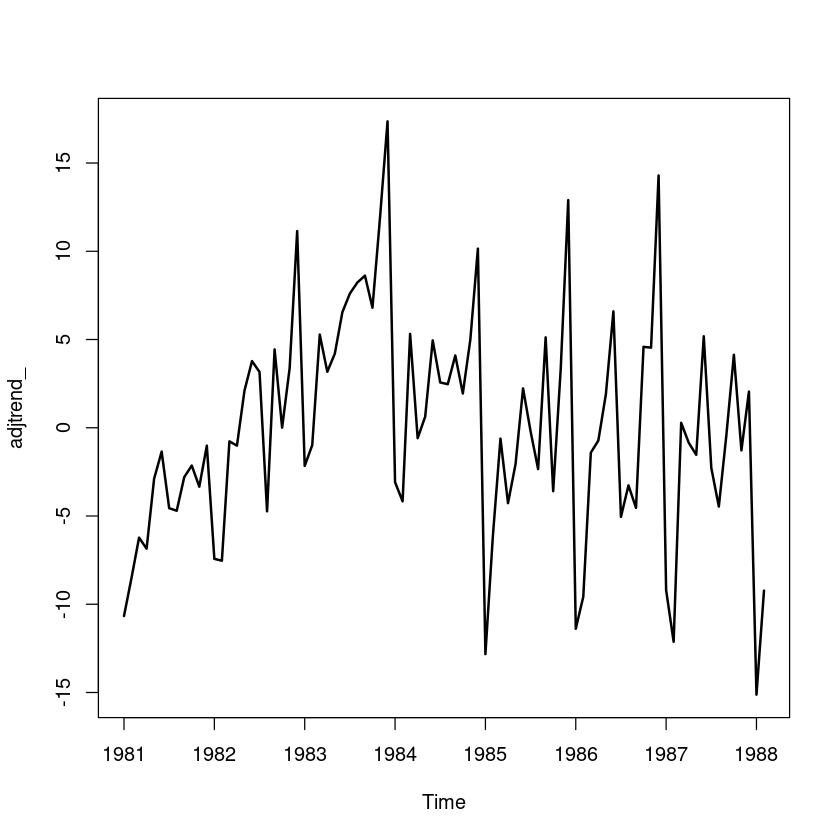

In [16]:
## 원시계열에서 추세성분 조정
adjtrend_ = export-hat_Tt
plot.ts(adjtrend_, lwd=2)

In [17]:
y = factor(cycle(adjtrend_))
fit1 <- lm(adjtrend_ ~ 0+y)  # 제약조건 beta0=0
summary(fit1)


Call:
lm(formula = adjtrend_ ~ 0 + y)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5684  -2.4909   0.0174   2.5296   9.4910 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   -8.9845     1.5237  -5.897 1.03e-07 ***
y2   -7.2747     1.5237  -4.774 8.87e-06 ***
y3    0.2649     1.6289   0.163   0.8713    
y4   -1.5889     1.6289  -0.975   0.3325    
y5    0.3345     1.6289   0.205   0.8379    
y6    3.9893     1.6289   2.449   0.0167 *  
y7    0.1784     1.6289   0.110   0.9131    
y8   -1.2583     1.6289  -0.772   0.4423    
y9    2.0722     1.6289   1.272   0.2073    
y10   1.6756     1.6289   1.029   0.3070    
y11   3.3590     1.6289   2.062   0.0427 *  
y12   9.5552     1.6289   5.866 1.17e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.31 on 74 degrees of freedom
Multiple R-squared:  0.5901,	Adjusted R-squared:  0.5236 
F-statistic: 8.878 on 12 and 74 DF,  p-value: 3.121e-10


$\hat S_t = -8.9845 I_1 + \dots +9.5552I_{12}$

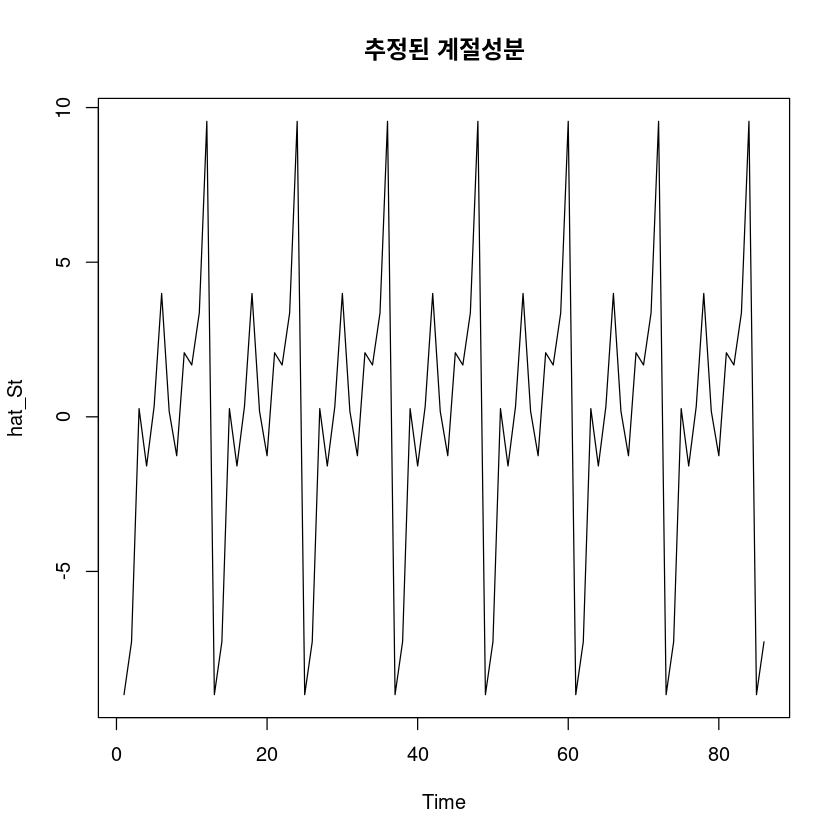

In [18]:
hat_St <- fitted(fit1)
ts.plot(hat_St, main="추정된 계절성분")

`-` 불규칙성분

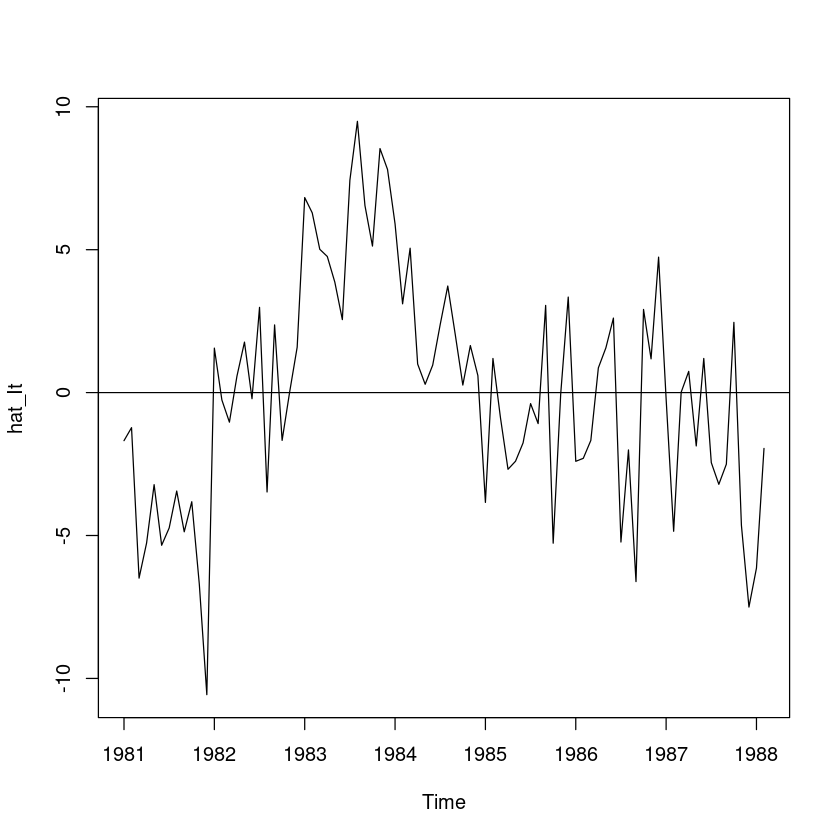

In [19]:
hat_It <- export - hat_Tt - hat_St
ts.plot(hat_It); abline(h=0)

`-` 추정

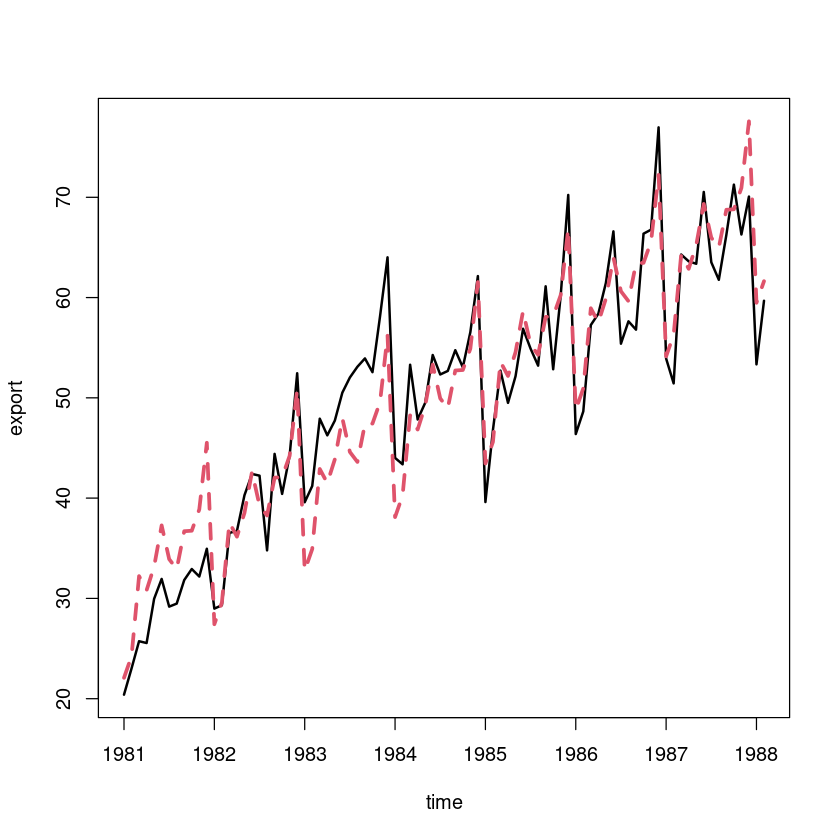

In [20]:
pred_a <- hat_Tt + hat_St

ts.plot(export, pred_a, col=1:2, lty=1:2, lwd=2:3,ylab="export", xlab="time")

In [21]:
sum((export-pred_a)^2)

[1] 1374.407

## (2)

추정된 불규칙성분의 분석을 통해 적용된 분해법이 적절했는지 논하여라.


In [22]:
t.test(hat_It) #H0 : mu=E(It)=0


	One Sample t-test

data:  hat_It
t = 8.2505e-16, df = 85, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.8621323  0.8621323
sample estimates:
   mean of x 
3.577489e-16 


- 평균이 0이다.

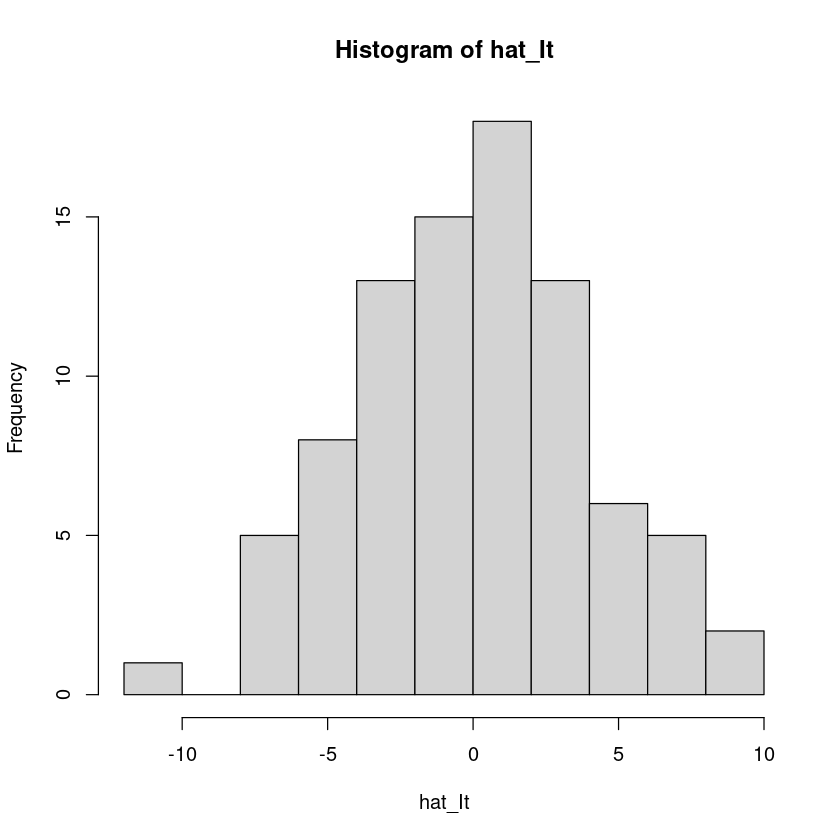

In [23]:
hist(hat_It)

In [24]:
dwtest(lm(hat_It~ t),
 alternative = 'two.sided')


	Durbin-Watson test

data:  lm(hat_It ~ t)
DW = 0.79194, p-value = 1.672e-10
alternative hypothesis: true autocorrelation is not 0


양의 상관관계가 있어보인다.

In [25]:
bptest(lm(hat_It ~ t, data = export))


	studentized Breusch-Pagan test

data:  lm(hat_It ~ t, data = export)
BP = 4.276, df = 1, p-value = 0.03865


## (3)

이동평균을 이용한 분해법에 의한 각 성분의 시계열 그림을 그려라

### 이동평균분해법

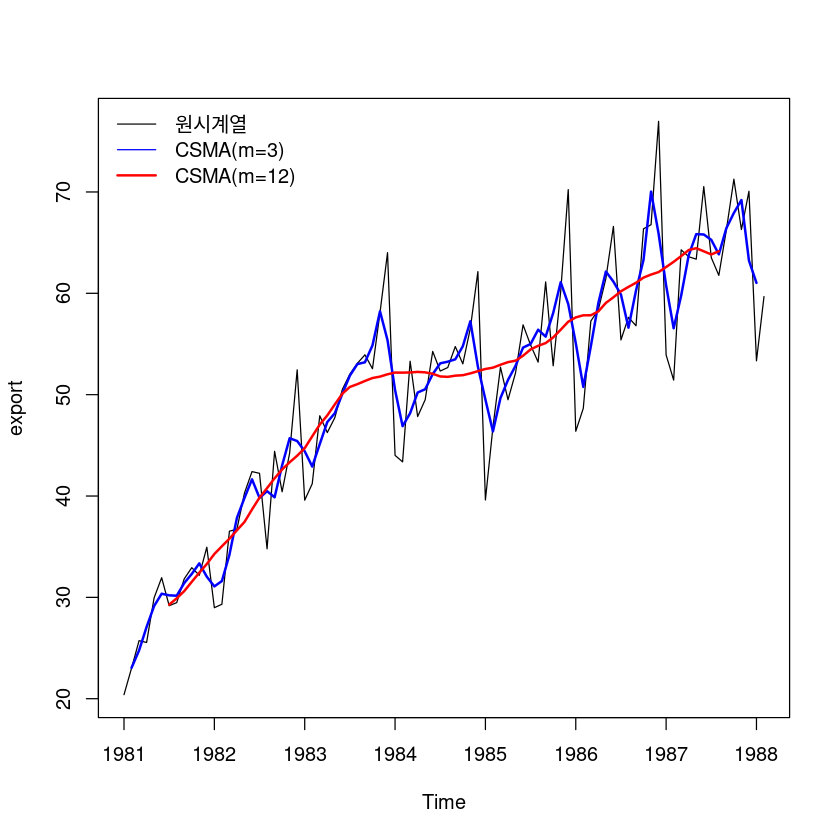

In [26]:
z <- scan("export.txt")
t <- 1:length(z)
export <- ts(z, start=c(1981,1), frequency=12)
#plot.ts(export, lwd=2, main="TS plot for export data")
plot.ts(export)
lines(ma(export,3), col='blue', lwd=2)
lines(ma(export,12), col='red', lwd=2)
legend('topleft', lty=c(1,1,1), col=c('black', 'blue', 'red'),
     lwd=c(1,1,2),
     c('원시계열', "CSMA(m=3)", "CSMA(m=12)"),
     bty='n')

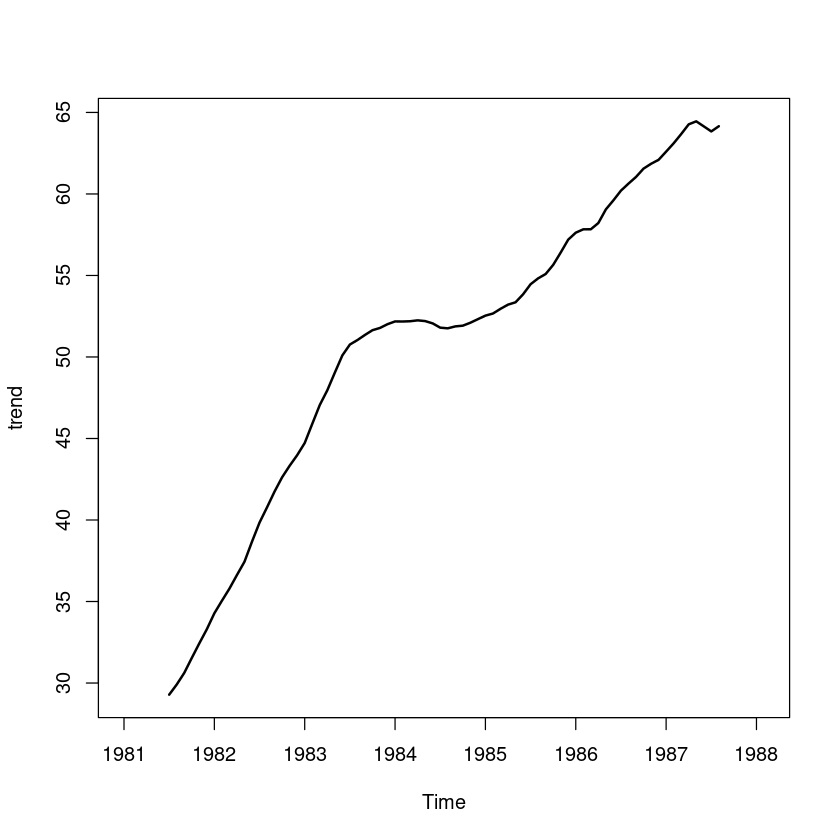

In [27]:
trend = ma(export, 12)
plot.ts(trend, lwd=2)

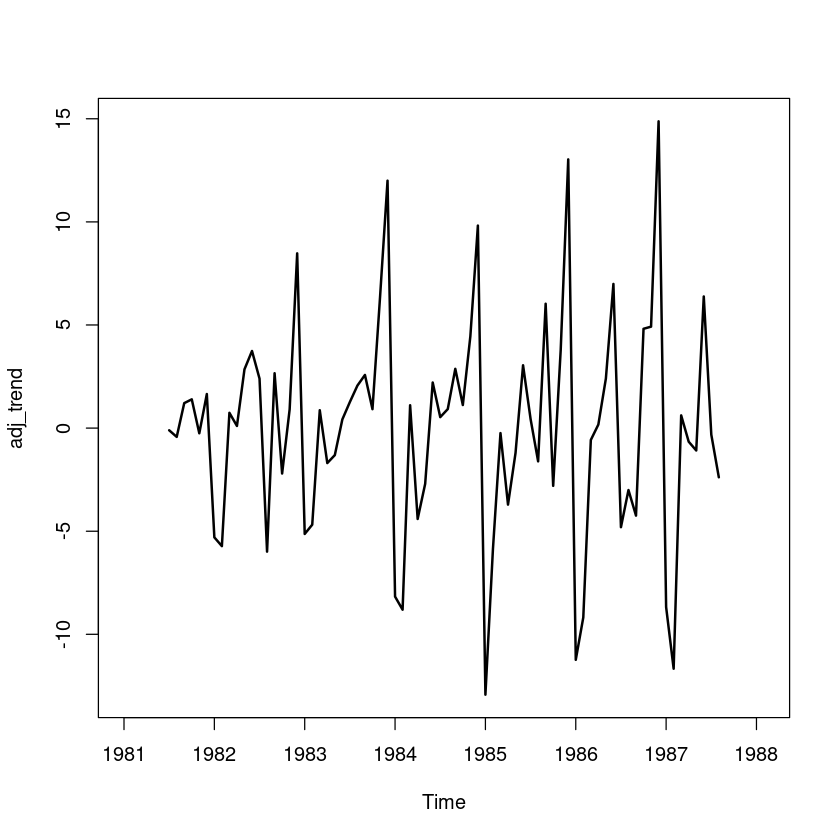

In [28]:
adj_trend <-export - trend
plot.ts(adj_trend, lwd=2)

In [29]:
seasonal <- tapply(adj_trend, cycle(adj_trend), function(y) mean(y,na.rm=T))
seasonal

1          2          3          4          5          6          7 
-8.5734722 -7.6545139  0.4188889 -1.6996528 -0.1743750  3.7981944 -0.0850000 
         8          9         10         11         12 
-1.4907738  1.8513889  0.5409722  3.3563194  9.9746528

In [30]:
summary(lm(adj_trend~0+as.factor(cycle(adj_trend))))


Call:
lm(formula = adj_trend ~ 0 + as.factor(cycle(adj_trend)))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3226 -1.4141  0.3492  1.8005  4.9008 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
as.factor(cycle(adj_trend))1   -8.5735     1.1268  -7.608 1.89e-10 ***
as.factor(cycle(adj_trend))2   -7.6545     1.1268  -6.793 4.90e-09 ***
as.factor(cycle(adj_trend))3    0.4189     1.1268   0.372  0.71135    
as.factor(cycle(adj_trend))4   -1.6997     1.1268  -1.508  0.13654    
as.factor(cycle(adj_trend))5   -0.1744     1.1268  -0.155  0.87752    
as.factor(cycle(adj_trend))6    3.7982     1.1268   3.371  0.00129 ** 
as.factor(cycle(adj_trend))7   -0.0850     1.0432  -0.081  0.93533    
as.factor(cycle(adj_trend))8   -1.4908     1.0432  -1.429  0.15803    
as.factor(cycle(adj_trend))9    1.8514     1.1268   1.643  0.10544    
as.factor(cycle(adj_trend))10   0.5410     1.1268   0.480  0.63286    
as.factor(cycle(adj_trend))11   3.3563     1.

In [31]:
mean(seasonal)

[1] 0.02188575

In [32]:
seasonal <- seasonal - mean(seasonal) #평균을 0으로 수정
seasonal

1          2          3          4          5          6          7 
-8.5953580 -7.6763996  0.3970031 -1.7215385 -0.1962607  3.7763087 -0.1068857 
         8          9         10         11         12 
-1.5126596  1.8295031  0.5190865  3.3344337  9.9527670

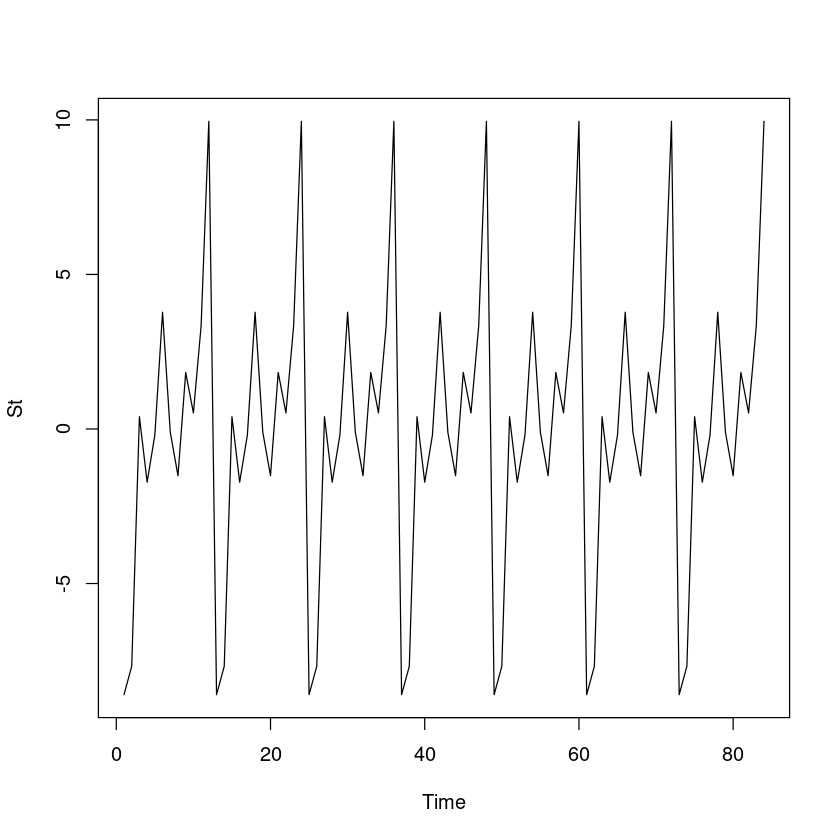

In [33]:
St = rep(seasonal, 7)
plot.ts(St)

Warning message in `-.default`(export - trend, St):
“longer object length is not a multiple of shorter object length”


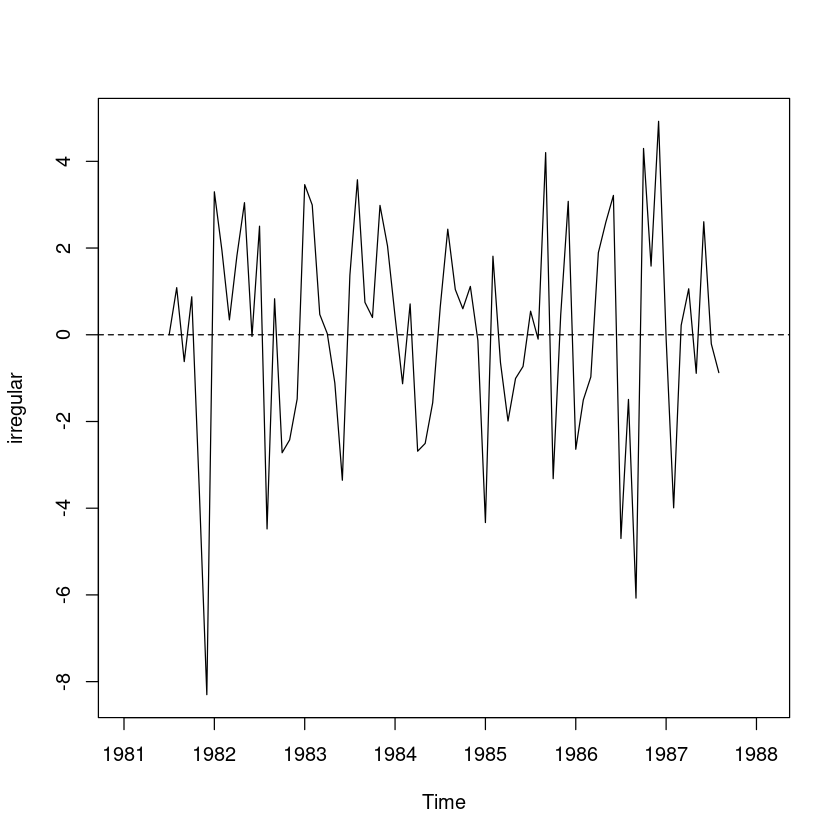

In [34]:
irregular <- export - trend - St
plot.ts(irregular)
abline(h=0, lty=2)

###  decompose 함수 이용

In [35]:
dec_fit <- decompose(export, 'additive')
dec_fit

$x
       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1981 20.40 23.01 25.73 25.55 29.96 31.94 29.18 29.48 31.83 32.93 32.18 34.95
1982 28.98 29.32 36.53 36.73 40.29 42.41 42.24 34.79 44.41 40.42 44.24 52.45
1983 39.59 41.21 47.92 46.26 47.73 50.52 52.03 53.10 53.93 52.56 58.10 64.01
1984 44.01 43.37 53.30 47.84 49.50 54.27 52.33 52.68 54.75 53.04 56.55 62.14
1985 39.61 46.80 52.71 49.50 52.15 56.89 54.90 53.21 61.12 52.85 60.20 70.23
1986 46.39 48.65 57.26 58.39 61.46 66.60 55.40 57.63 56.80 66.37 66.77 76.97
1987 53.92 51.44 64.29 63.61 63.37 70.53 63.52 61.77 66.25 71.26 66.29 70.07
1988 53.34 59.68                                                            

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1981 -8.5953580 -7.6763996  0.3970031 -1.7215385 -0.1962607  3.7763087
1982 -8.5953580 -7.6763996  0.3970031 -1.7215385 -0.1962607  3.7763087
1983 -8.5953580 -7.6763996  0.3970031 -1.7215385 -0.1962607  3.7763087
1984 -8.5

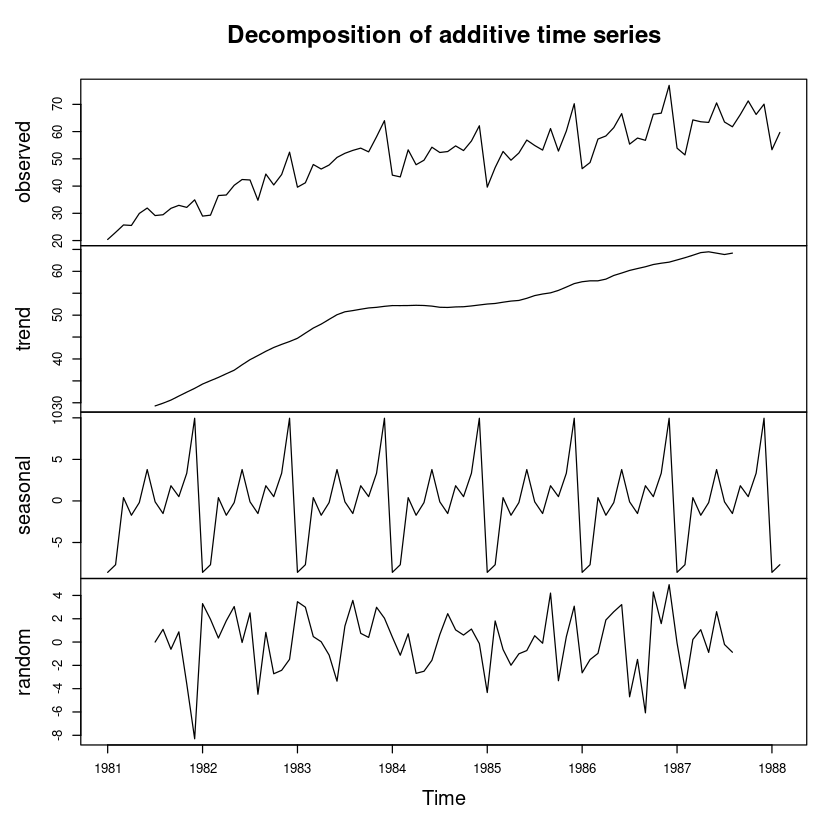

In [36]:
plot(dec_fit)

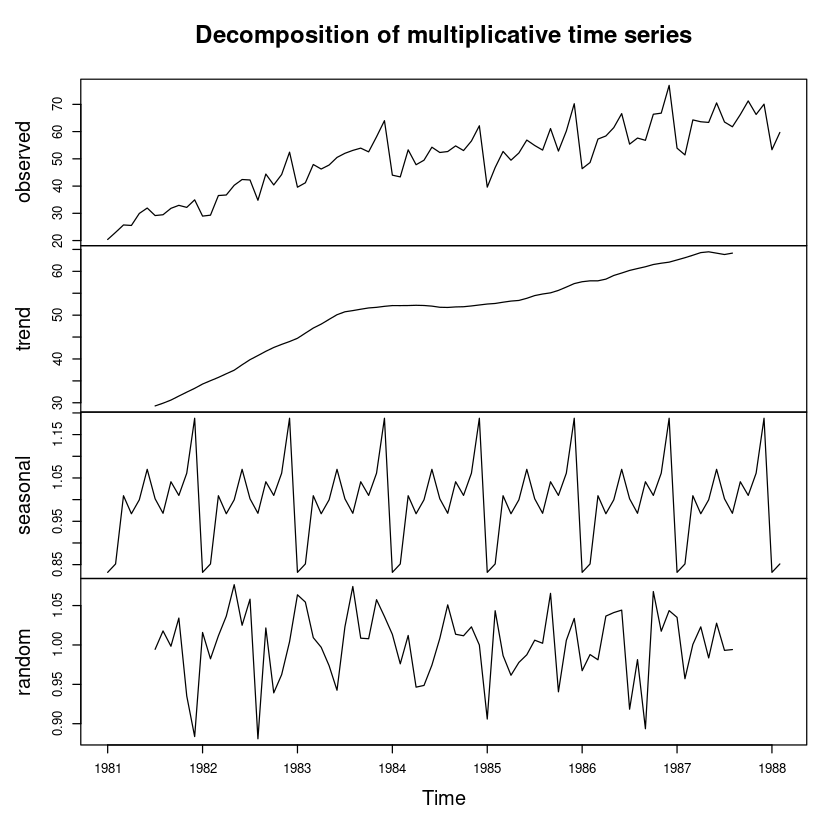

In [37]:
dec_fit2 <- decompose(export, type = "multiplicative")
plot(dec_fit2)

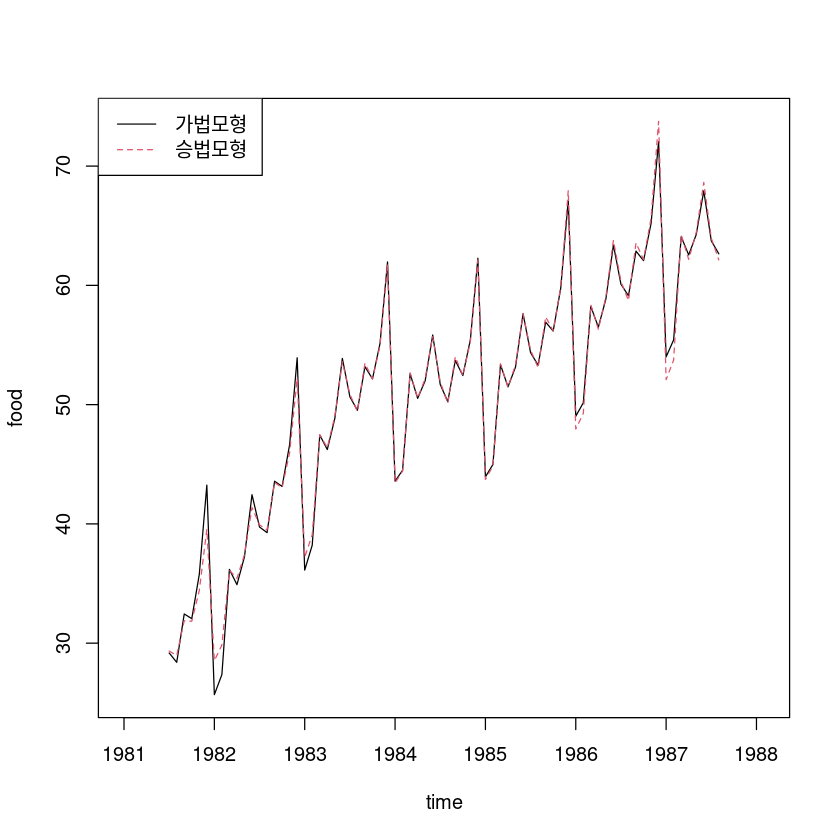

In [38]:
## 가법모형 vs. 승법모형
pred_dec <-dec_fit$trend+dec_fit$seasonal
pred_dec2 <-dec_fit2$trend*dec_fit2$seasonal

ts.plot(pred_dec, pred_dec2, col=1:2, lty=1:2, ylab="food", xlab="time")
legend("topleft", lty=1:2, col=1:2, c("가법모형", "승법모형"))

### stl함수 이용

In [39]:
stl_fit1 <- stl(export, s.window=12)
stl_fit1

 Call:
 stl(x = export, s.window = 12)

Components
            seasonal    trend    remainder
Jan 1981 -8.03824134 26.81776  1.620485206
Feb 1981 -6.63002814 27.30969  2.330333480
Mar 1981 -0.13110622 27.80163 -1.940526967
Apr 1981 -2.16782904 28.29357 -0.575742678
May 1981 -0.02387280 28.83742  1.146455416
Jun 1981  3.12006392 29.38126 -0.561326978
Jul 1981  0.19259616 29.92511 -0.937704893
Aug 1981 -1.39615399 30.52457  0.351588714
Sep 1981  2.08889246 31.12402 -1.382914272
Oct 1981  0.78594126 31.72348  0.420580381
Nov 1981  3.14306515 32.53144 -3.494505630
Dec 1981  9.25329283 33.33940 -7.642695428
Jan 1982 -8.18853645 34.14736  3.021171726
Feb 1982 -6.74205914 35.02084  1.041217119
Mar 1982 -0.11359668 35.89432  0.749277352
Apr 1982 -2.14642909 36.76780  2.108632461
May 1982 -0.04765717 37.74653  2.591125433
Jun 1982  3.22089766 38.72527  0.463835494
Jul 1982  0.10549237 39.70400  2.430505678
Aug 1982 -1.41993463 40.61875 -4.408810621
Sep 1982  2.04045104 41.53349  0.836060406
Oct

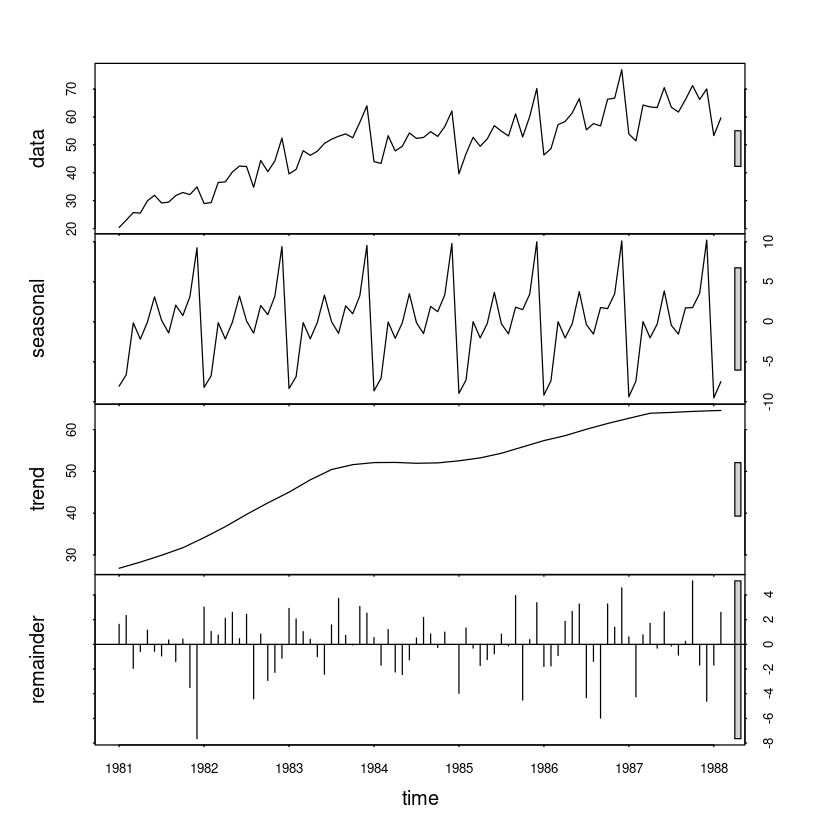

In [40]:
plot(stl_fit1)

In [41]:
pred_stl <- stl_fit1$time.series[,1]+stl_fit1$time.series[,2]


## (4)

추정된 불규칙성분의 분석을 통해 적용된 분해법이 적절했는지 논하여라.

In [42]:
t.test(irregular)


	One Sample t-test

data:  irregular
t = 0.074013, df = 73, p-value = 0.9412
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5674456  0.6112171
sample estimates:
 mean of x 
0.02188575 


In [43]:
dwtest(lm(irregular~1))


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.9469, p-value = 0.4094
alternative hypothesis: true autocorrelation is greater than 0


In [44]:
dwtest(lm(irregular~t))


	Durbin-Watson test

data:  lm(irregular ~ t)
DW = 1.9477, p-value = 0.3643
alternative hypothesis: true autocorrelation is greater than 0


### 추정

Warning message in `+.default`(trend, St):
“longer object length is not a multiple of shorter object length”


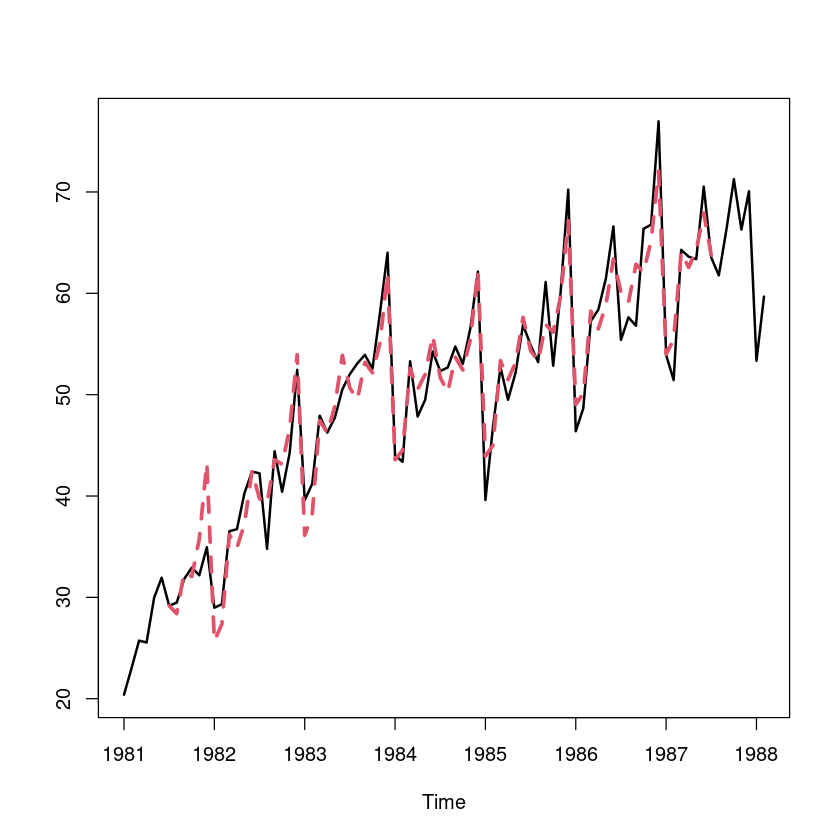

In [45]:
fit_ <- trend + St
ts.plot(export, fit_, lty=1:2, col=1:2, lwd=2:3)

## (5)

각 분해법에 의한 결과를 1-시착 후 예측오차의 제곱합 (SSE) 기준하에서 2번의 결과와 예측
력을 비교하여라.

`-` decompose

In [47]:
sum((export-pred_dec)^2, na.rm=T) #SSE - 가법
sum((export-pred_dec2)^2, na.rm=T) #SSE - 승법

[1] 472.3815

[1] 353.1762

`-` stl

In [48]:
sum((export-pred_stl)^2) 

[1] 506.7057

# 5

(R 실습) ‘usapass.txt’는 미국 월별 비행기 승객 수(단위 : 천 명)의 시계열자료이다. log 변환 후 아래의 분석을 수행하시오. ((2),(3),(4)번에 대하여 모형을 적합한 후 실제데이터와 각 모형에서 구해진 추정값을 비교하는 그림도 포함)

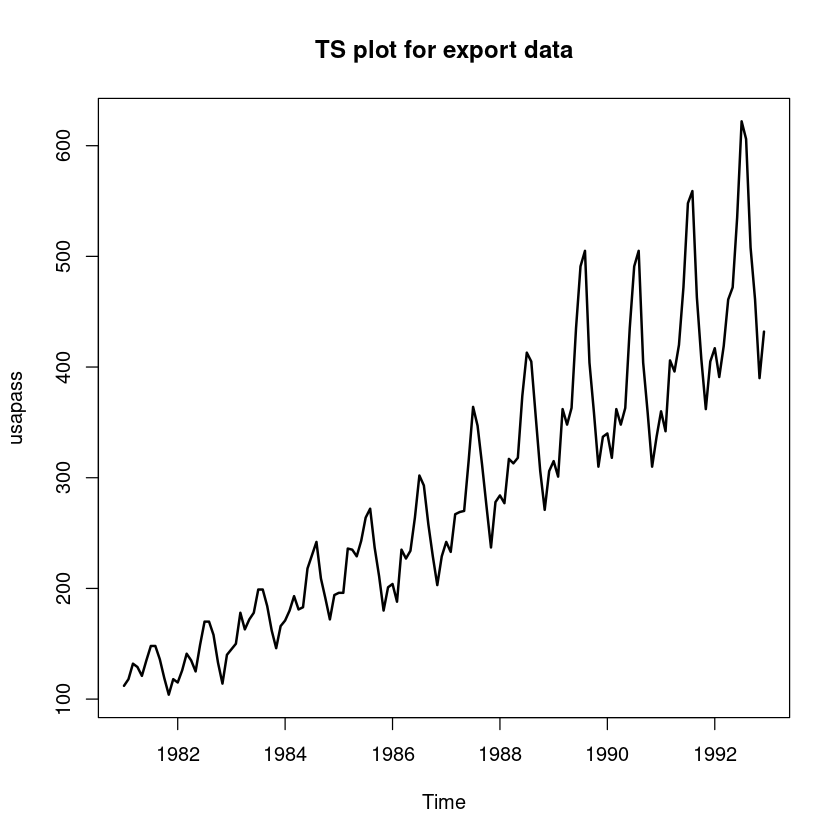

In [2]:
z5 <- scan("usapass.txt")
t <- 1:length(z5)
usapass <- ts(z5, start=c(1981,1), frequency=12)

plot.ts(usapass, lwd=2, main="TS plot for export data")

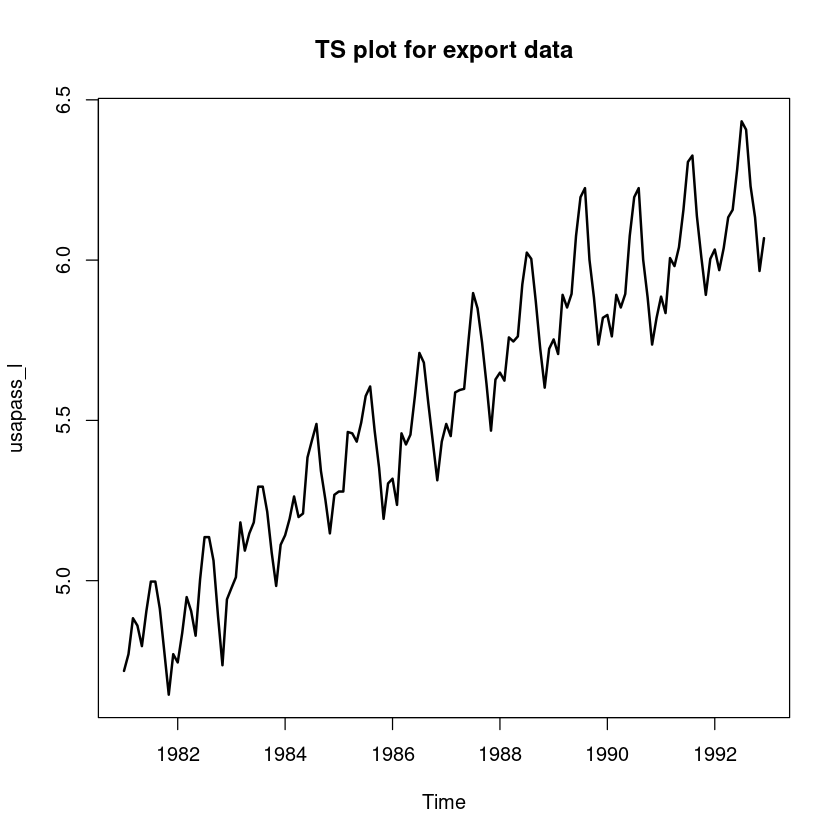

In [3]:
usapass_l <- ts(log(z5), start=c(1981,1), frequency=12)
plot.ts(usapass_l, lwd=2, main="TS plot for export data")

## (1)

왜 log 변환이 필요한지에 대해 간단히 설명하여라.

시도표를 확인하면 시간에 따라 분산이 커지는 것을 볼수 있다. 이는 모델의 결과가 잘못된 값이 나올 수 있다. 

## (2)

적절한 추세 모형을 적합시킨 후 잔차분석을 하여라.

In [4]:
z5_ts <- ts(z5, frequency=12)
cycle(z5_ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,1,2,3,4,5,6,7,8,9,10,11,12
2,1,2,3,4,5,6,7,8,9,10,11,12
3,1,2,3,4,5,6,7,8,9,10,11,12
4,1,2,3,4,5,6,7,8,9,10,11,12
5,1,2,3,4,5,6,7,8,9,10,11,12
6,1,2,3,4,5,6,7,8,9,10,11,12
7,1,2,3,4,5,6,7,8,9,10,11,12
8,1,2,3,4,5,6,7,8,9,10,11,12
9,1,2,3,4,5,6,7,8,9,10,11,12
10,1,2,3,4,5,6,7,8,9,10,11,12


In [5]:
seasonal_I <- as.factor(cycle(z5_ts))
t <- 1:length(z5)
m3 <- lm(log(z5)~t+seasonal_I)

In [6]:
summary(m3)


Call:
lm(formula = log(z5) ~ t + seasonal_I)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.159814 -0.044426  0.000623  0.045572  0.151846 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.7246982  0.0198289 238.274  < 2e-16 ***
t             0.0100999  0.0001252  80.666  < 2e-16 ***
seasonal_I2  -0.0220859  0.0254094  -0.869  0.38633    
seasonal_I3   0.1095029  0.0254104   4.309 3.19e-05 ***
seasonal_I4   0.0768102  0.0254119   3.023  0.00302 ** 
seasonal_I5   0.0762636  0.0254141   3.001  0.00322 ** 
seasonal_I6   0.1990500  0.0254168   7.831 1.45e-12 ***
seasonal_I7   0.3049668  0.0254202  11.997  < 2e-16 ***
seasonal_I8   0.2976260  0.0254242  11.706  < 2e-16 ***
seasonal_I9   0.1461189  0.0254289   5.746 6.08e-08 ***
seasonal_I10  0.0110851  0.0254341   0.436  0.66367    
seasonal_I11 -0.1341418  0.0254399  -5.273 5.39e-07 ***
seasonal_I12 -0.0214153  0.0254464  -0.842  0.40156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

- 적합된 모형: $\hat Z_t = 4.72 + 0.01t - 0.022I_{t2} + \dots - 0.021 I_{t12}$

In [7]:
tmp.data <- data.frame(
 day = seq(ymd("1984-01-01"),
 by='1 month', length.out=length(z5)),
 z=z5
)

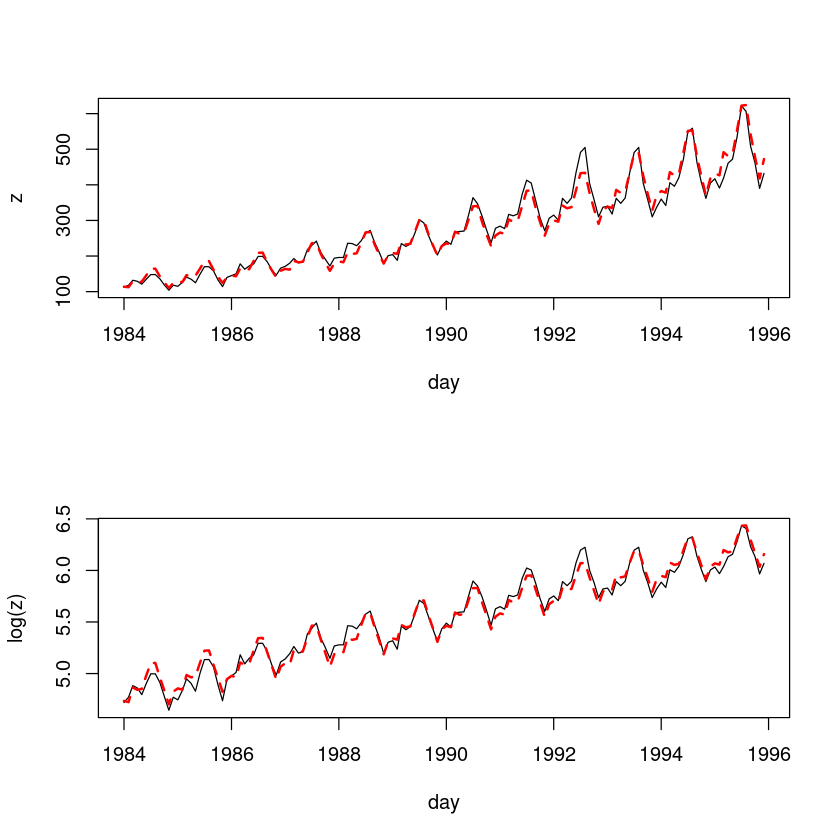

In [8]:

par(mfrow=c(2,1)) 
plot(z~day, tmp.data, type='l')
lines(tmp.data$day, exp(fitted(m3)), col='red', lty=2, lwd=2)    # m3에 exp함수 처리
plot(log(z)~day, tmp.data, type='l')
lines(tmp.data$day, fitted(m3), col='red', lty=2, lwd=2)

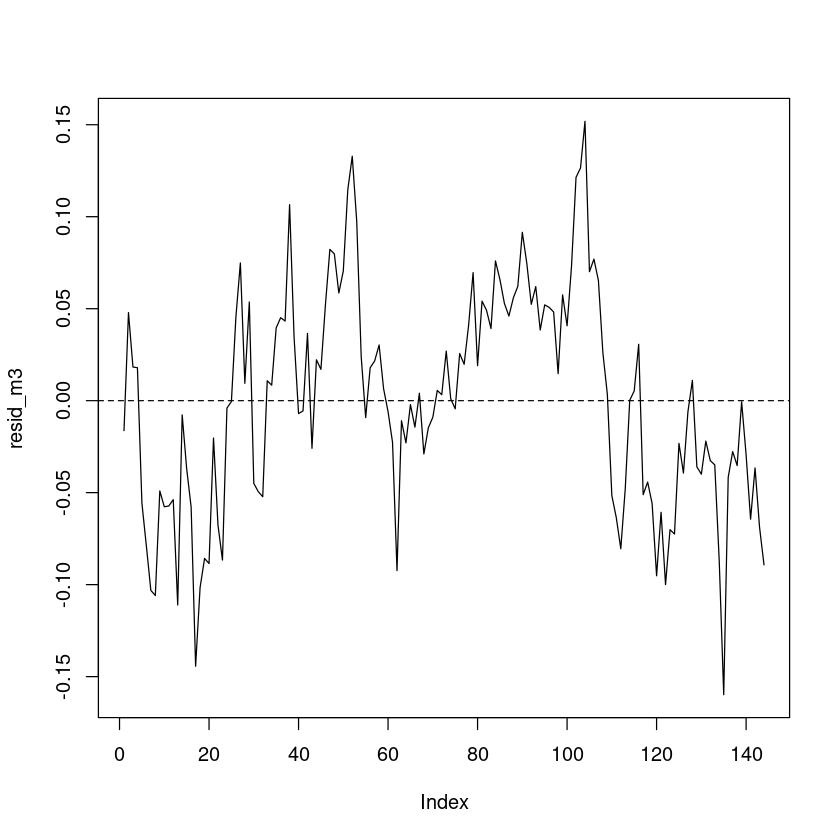

In [9]:
resid_m3 <- resid(m3)
plot(resid_m3, pch=16, type='l')
abline(h=0, lty=2)

In [10]:
t.test(resid_m3)


	One Sample t-test

data:  resid_m3
t = 1.4082e-16, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.009812747  0.009812747
sample estimates:
   mean of x 
6.990845e-19 


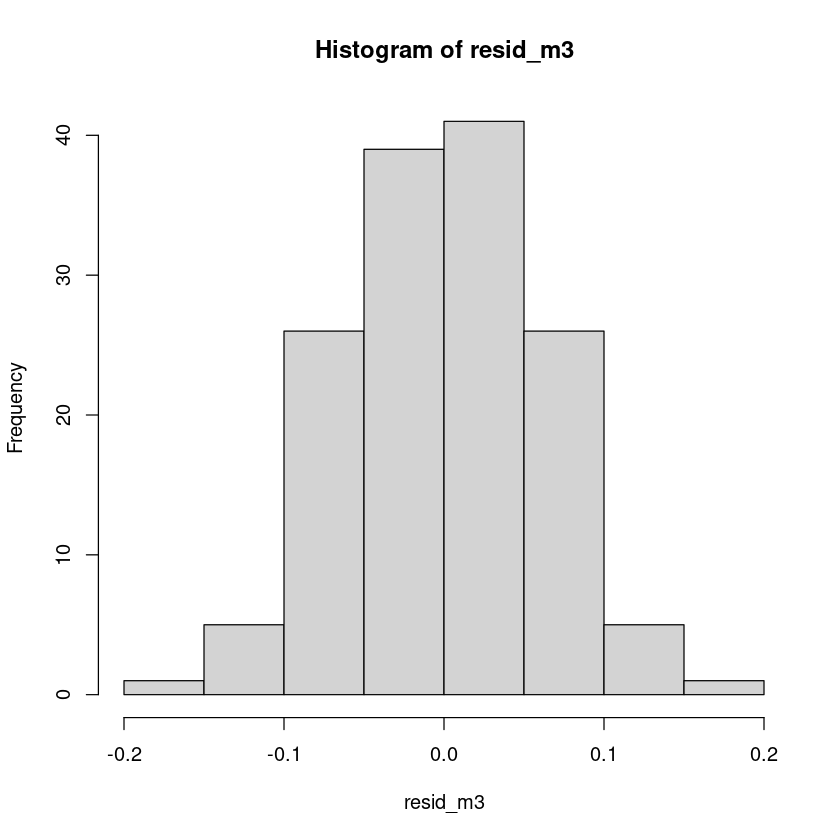

In [11]:
hist(resid_m3)

In [12]:
lmtest::bptest(m3)


	studentized Breusch-Pagan test

data:  m3
BP = 5.9163, df = 12, p-value = 0.9202


In [13]:
lmtest::dwtest(m3, alternative="two.sided")


	Durbin-Watson test

data:  m3
DW = 0.40831, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


In [14]:
sum((summary(m3)$residual)^2)

[1] 0.5074598

## (3)

적절한 평활법을 적용한 후 잔차분석을 하여라.

### 가법모형

In [15]:
fit_hw_l <- HoltWinters(usapass_l, seasonal="additive")

In [16]:
fit_hw_l

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = usapass_l, seasonal = "additive")

Smoothing parameters:
 alpha: 0.3447498
 beta : 0.003585913
 gamma: 0.879488

Coefficients:
            [,1]
a    6.165298459
b    0.008744433
s1  -0.073696849
s2  -0.142822821
s3  -0.039964334
s4   0.015968620
s5   0.033673237
s6   0.157016140
s7   0.300626468
s8   0.285698068
s9   0.098491289
s10 -0.021898771
s11 -0.190036243
s12 -0.096734648

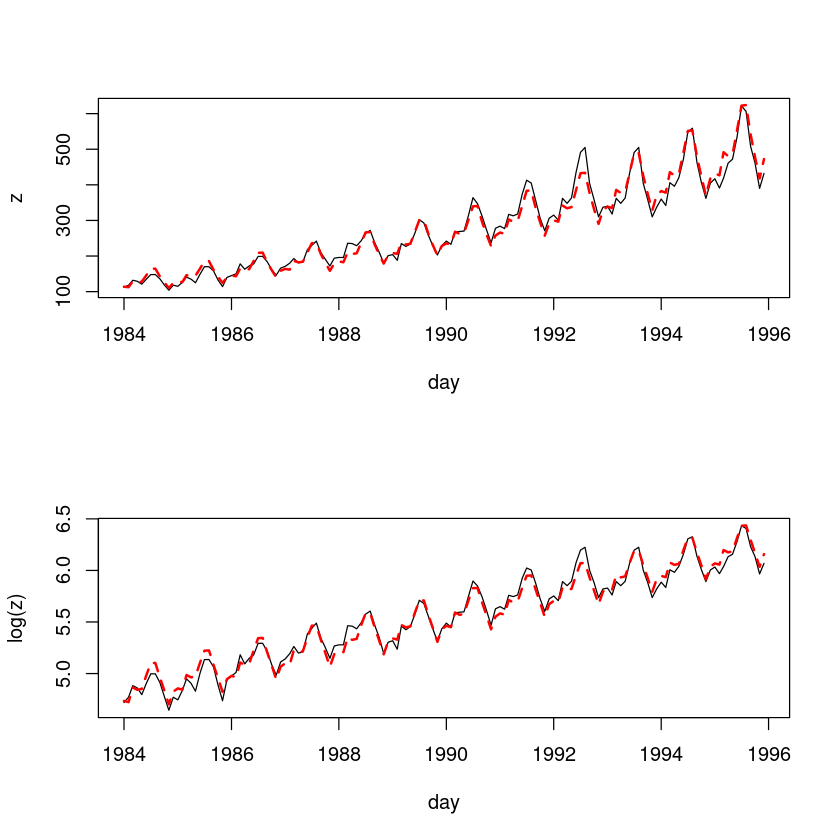

In [50]:

par(mfrow=c(2,1)) 
plot(z~day, tmp.data, type='l')
lines(tmp.data$day, exp(fitted(m3)), col='red', lty=2, lwd=2)    # m3에 exp함수 처리
plot(log(z)~day, tmp.data, type='l')
lines(tmp.data$day, fitted(m3), col='red', lty=2, lwd=2)

In [18]:
fit6= hw(usapass_l,
 alpha = fit_hw_l$alpha,
 beta = fit_hw_l$beta,
 gamma = fit_hw_l$gamma,
 seasonal="additive",
 initial="simple",
 h=12)
fit6$model

Holt-Winters' additive method 

Call:
 hw(y = usapass_l, h = 12, seasonal = "additive", initial = "simple",  

 Call:
     alpha = fit_hw_l$alpha, beta = fit_hw_l$beta, gamma = fit_hw_l$gamma) 

  Smoothing parameters:
    alpha = 0.3447 
    beta  = 0.0036 
    gamma = 0.8795 

  Initial states:
    l = 4.8362 
    b = 0.0079 
    s = -0.0655 -0.1918 -0.0571 0.0765 0.161 0.161
           0.0691 -0.0404 0.0236 0.0466 -0.0655 -0.1177

  sigma:  0.0425

`-` 원데이터와 비교그림 넣어주기 위해서 exp취해줌

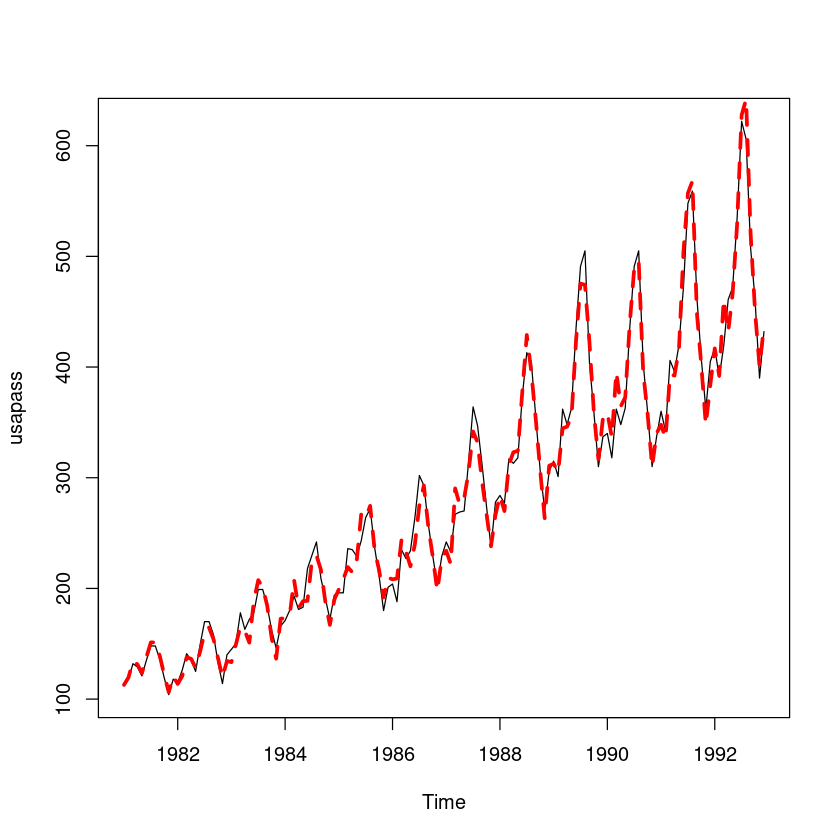

In [262]:
plot(usapass)
lines(exp(fit6$fitted), lwd=3, col='red', lty=2)

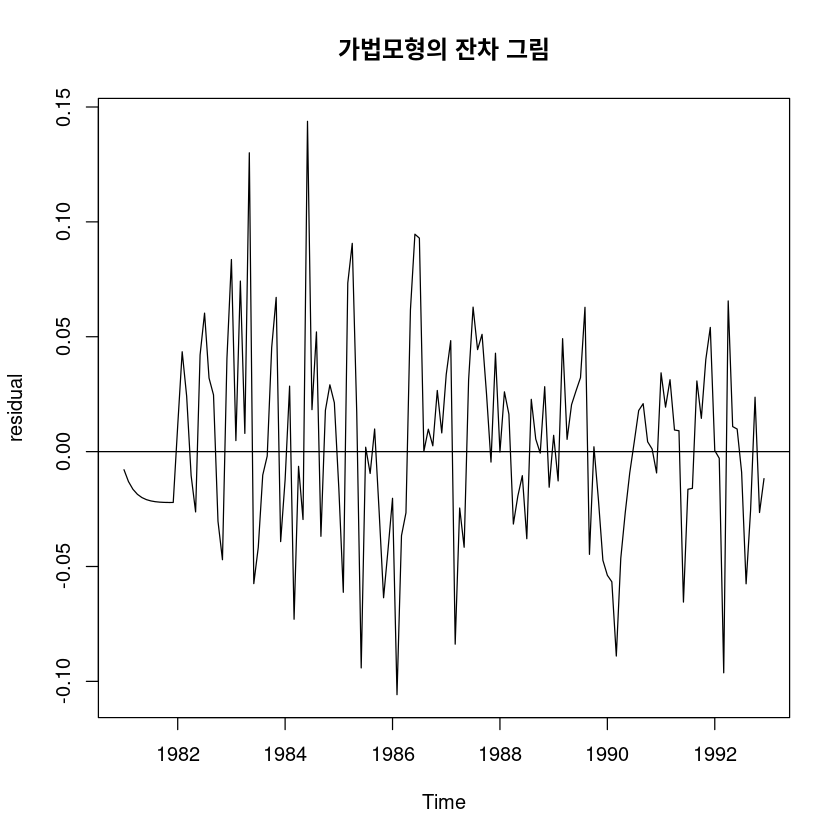

In [19]:
ts.plot(fit6$residual, ylab="residual",
 main="가법모형의 잔차 그림"); abline(h=0)

In [20]:
t.test(fit6$residual)


	One Sample t-test

data:  fit6$residual
t = 0.72402, df = 143, p-value = 0.4702
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.004441394  0.009575433
sample estimates:
  mean of x 
0.002567019 


In [21]:
dwtest(lm(fit6$residual~1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(fit6$residual ~ 1)
DW = 1.5421, p-value = 0.005659
alternative hypothesis: true autocorrelation is not 0


### 승법모형(원데이터로 진행해봄)

In [264]:
fit_hw_m <- HoltWinters(usapass, seasonal="multiplicative")

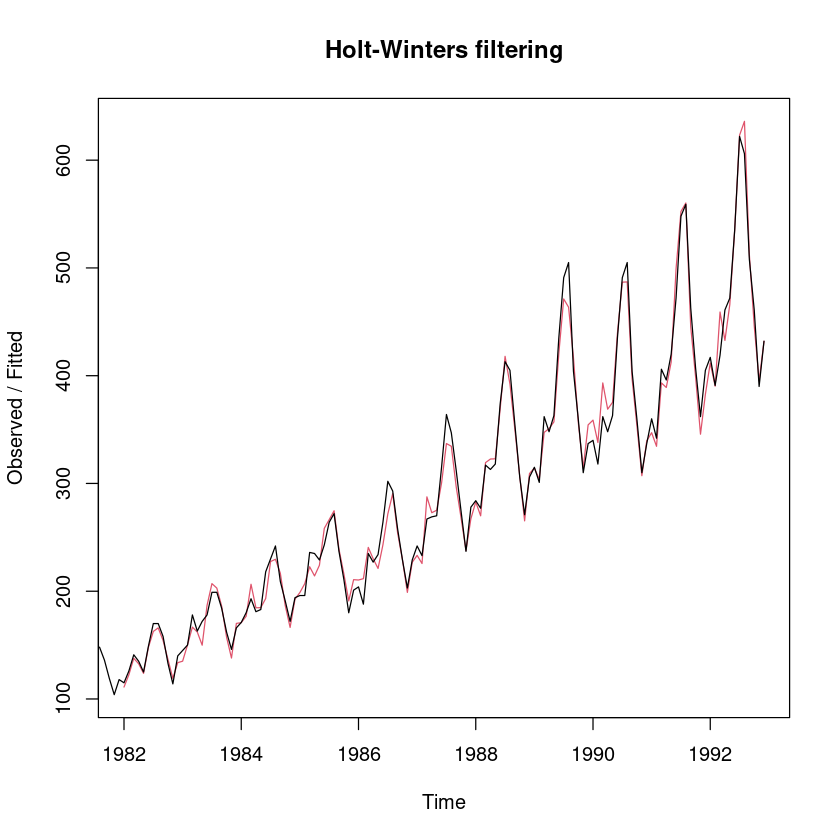

In [267]:
plot(fit_hw_m)

In [265]:
fit7= hw(usapass,
 alpha = fit_hw_m$alpha,
 beta = fit_hw_m$beta,
 gamma = fit_hw_m$gamma,
 seasonal="multiplicative",
 initial="simple",
 h=12)
fit7$model

Holt-Winters' multiplicative method 

Call:
 hw(y = usapass, h = 12, seasonal = "multiplicative", initial = "simple",  

 Call:
     alpha = fit_hw_m$alpha, beta = fit_hw_m$beta, gamma = fit_hw_m$gamma) 

  Smoothing parameters:
    alpha = 0.3205 
    beta  = 0.0239 
    gamma = 1 

  Initial states:
    l = 126.6667 
    b = 1.0833 
    s = 0.9316 0.8211 0.9395 1.0737 1.1684 1.1684
           1.0658 0.9553 1.0184 1.0421 0.9316 0.8842

  sigma:  0.0465

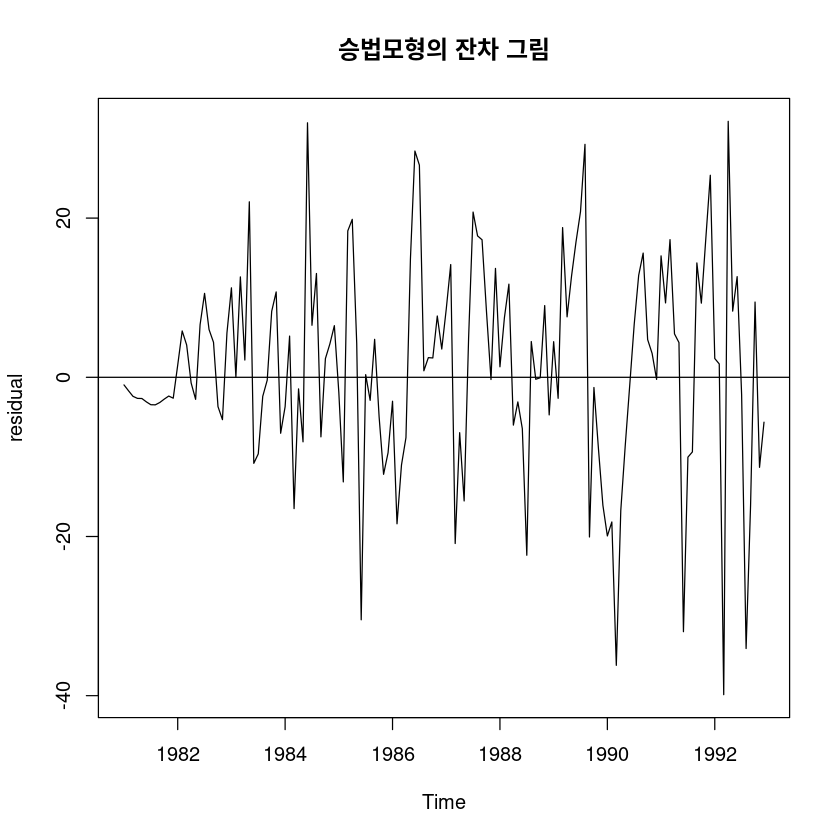

In [268]:
ts.plot(fit7$residual, ylab="residual",
 main="승법모형의 잔차 그림"); abline(h=0)

In [269]:
t.test(fit7$residual)


	One Sample t-test

data:  fit7$residual
t = 1.0873, df = 143, p-value = 0.2787
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.9675137  3.3332414
sample estimates:
mean of x 
 1.182864 


In [216]:
dwtest(lm(fit7$residual~1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(fit7$residual ~ 1)
DW = 1.4311, p-value = 0.0005873
alternative hypothesis: true autocorrelation is not 0


## (4)

적절한 분해법에 의해 각 성분을 분해해여 시계열 그림을 그려라.


### decopose분해법

In [22]:
dec_f_a_l <- decompose(usapass_l, 'additive')

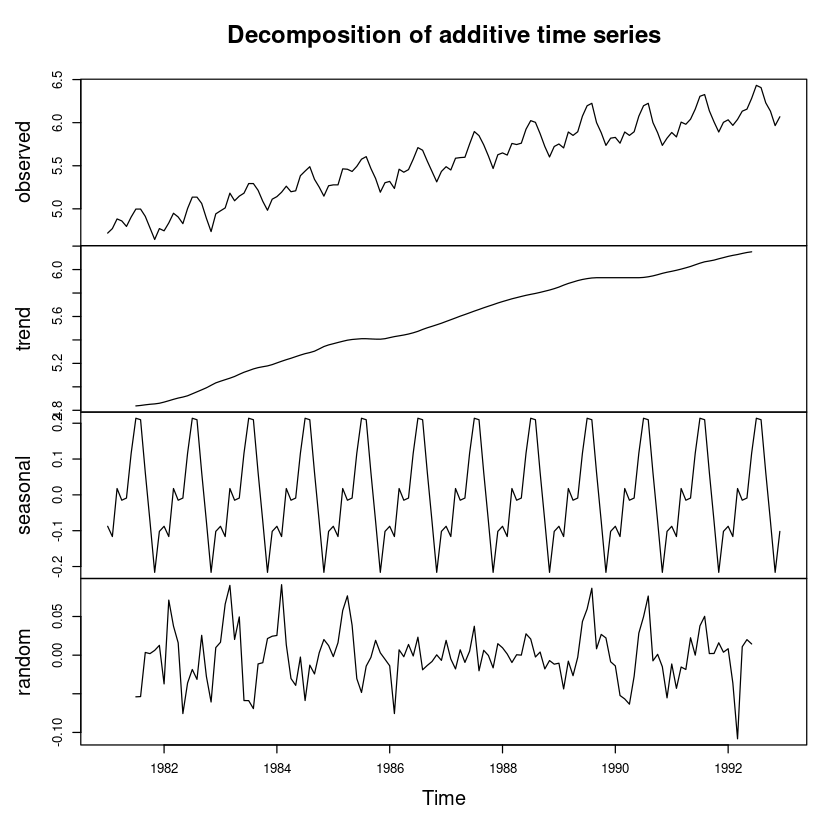

In [23]:
plot(dec_f_a_l) # 로그변환 후 분해법

In [34]:
# ## 승법모형 비교용
# dec_f_m <- decompose(usapass, type = "multiplicative")
# plot(dec_f_m)

In [28]:
pred_dec_ <- dec_f_a_l$trend + dec_f_a_l$seasonal

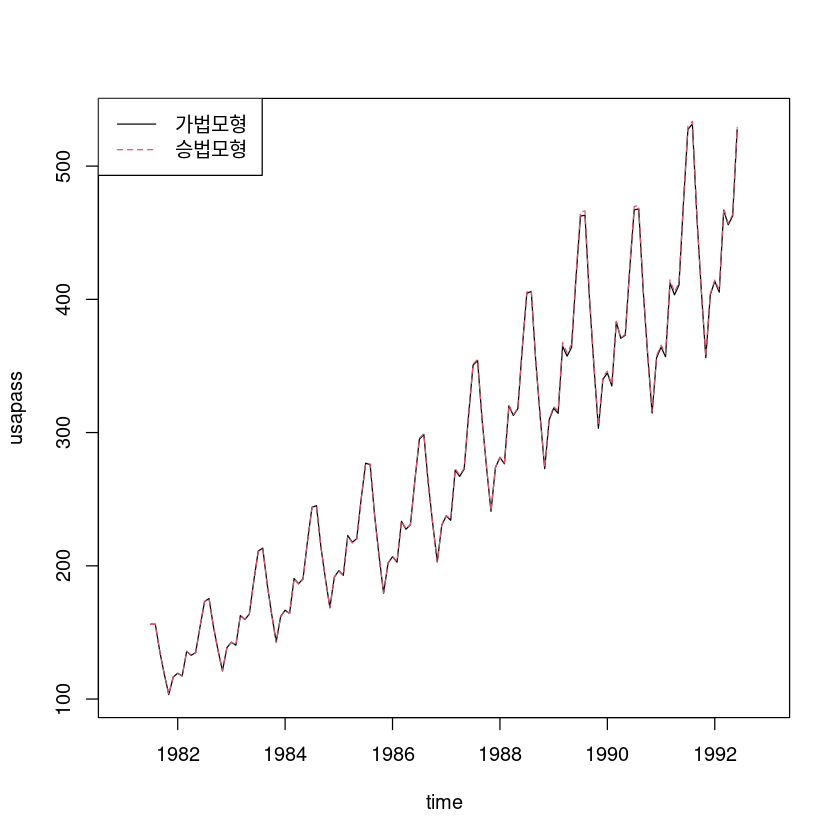

In [35]:
## 가법모형 vs. 승법모형
pred_dec_ <-dec_f_a_l$trend+dec_f_a_l$seasonal
pred_dec2_ <-dec_f_m$trend*dec_f_m$seasonal

ts.plot(exp(pred_dec_), pred_dec2_, col=1:2, lty=1:2, ylab="usapass", xlab="time")
legend("topleft", lty=1:2, col=1:2, c("가법모형", "승법모형"))

In [40]:
sum((usapass_l-pred_dec_)^2, na.rm=T) 

[1] 0.1615075

### stl(비교용)

In [51]:
stl_fit11 <- stl(usapass_l, s.window=12)

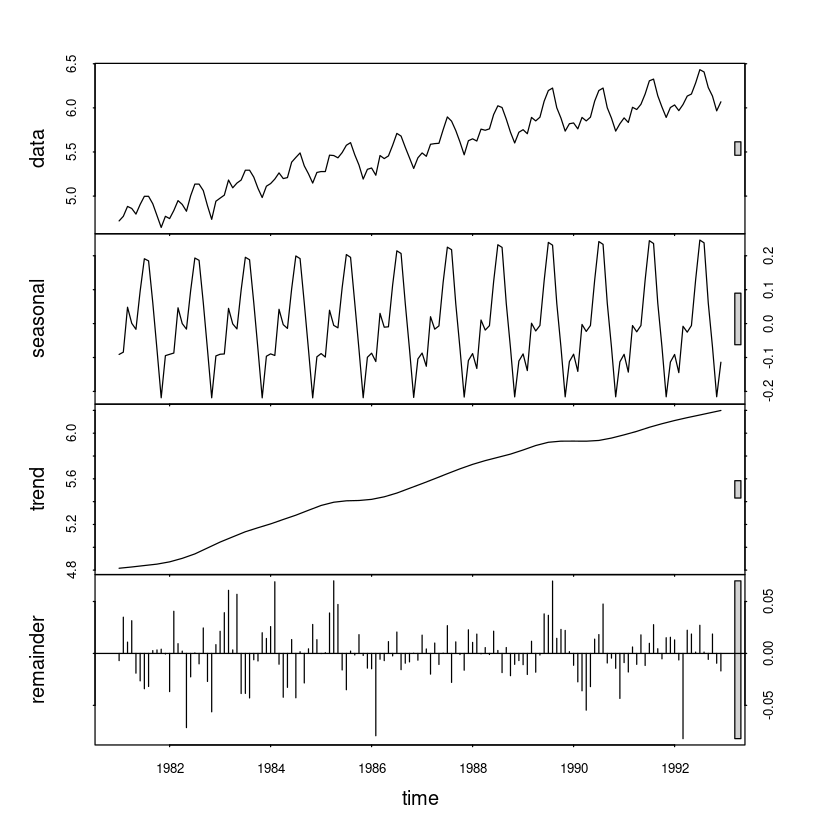

In [43]:
plot(stl_fit11)

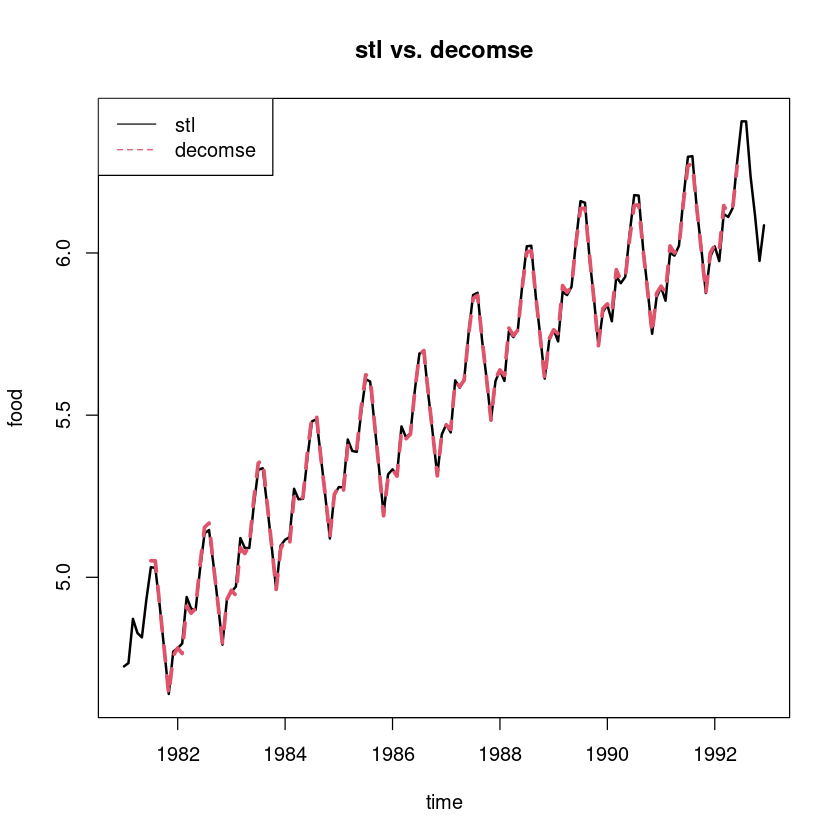

In [44]:
## stl vs. decompose
pred_stl <- stl_fit11$time.series[,1]+stl_fit11$time.series[,2]

ts.plot(pred_stl, pred_dec_, col=1:2, lty=1:2, lwd=2:3, ylab="food", xlab="time",
     main="stl vs. decomse")
legend("topleft", lty=1:2, col=1:2, c("stl", "decomse"))

In [46]:
### SSE : 1-시차 후 예측 오차 제곱합
sum((usapass_l-pred_stl)^2) #144
sum((usapass_l-pred_dec_)^2, na.rm=T) #144-12=132

[1] 0.1017452

[1] 0.1615075

### 추세를 이용한 분해법(가법)

In [274]:
fit45 <- lm(usapass_l ~ t)
summary(fit45)


Call:
lm(formula = usapass_l ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30875 -0.10481 -0.01736  0.09677  0.36311 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.8131072  0.0237011  203.07   <2e-16 ***
t           0.0100802  0.0002836   35.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1415 on 142 degrees of freedom
Multiple R-squared:  0.899,	Adjusted R-squared:  0.8982 
F-statistic:  1263 on 1 and 142 DF,  p-value: < 2.2e-16


- $\hat T_t = 4.8131072 + 0.0100802t$

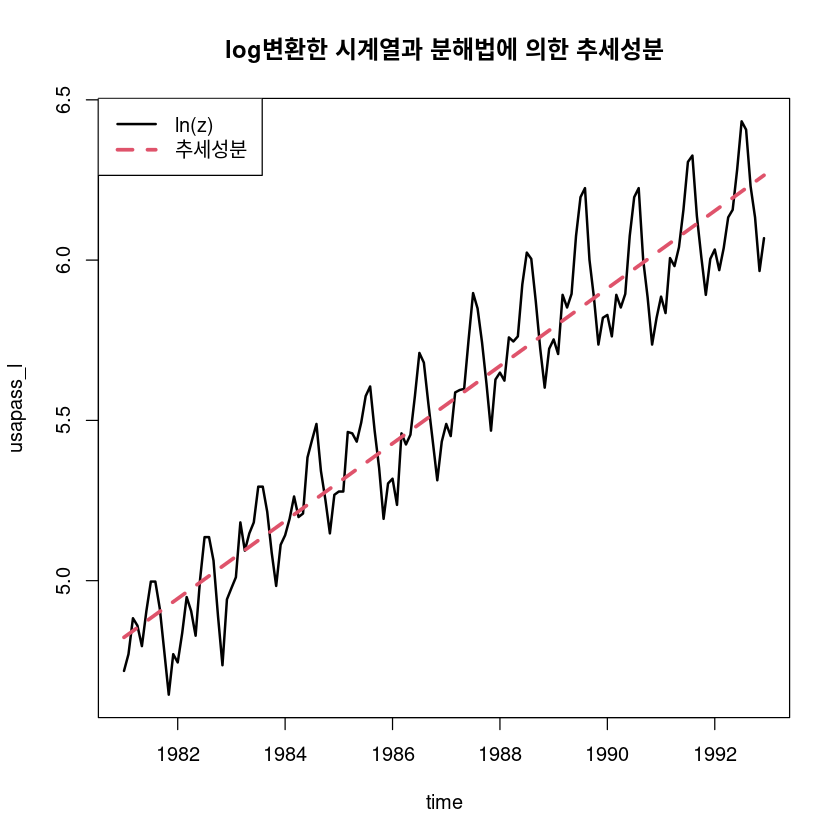

In [275]:
hat_Tt_l <- fitted(fit45)

ts.plot(usapass_l, hat_Tt_l,
     col=1:2,
     lty=1:2,
     lwd=2:3,
     ylab="usapass_l", xlab="time",
     main="log변환한 시계열과 분해법에 의한 추세성분")
legend("topleft", lty=1:2, col=1:2, lwd=2:3, c("ln(z)", "추세성분"))

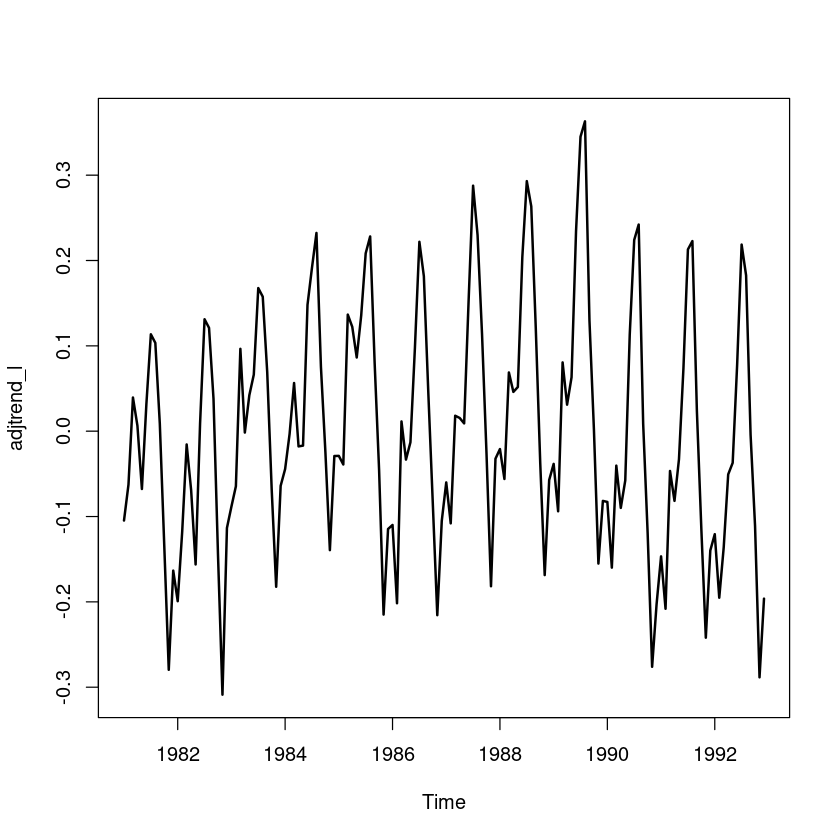

In [278]:
## 원시계열에서 추세성분 조정
adjtrend_l = usapass_l-hat_Tt_l
plot.ts(adjtrend_l, lwd=2)

In [279]:
## 지시함수를 이용한 계절성분 추정
y = factor(cycle(adjtrend_l)) #범주형 변수로 변환

fit456 <- lm(adjtrend_l ~ 0+y)
summary(fit456)


Call:
lm(formula = adjtrend_l ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.158515 -0.044012  0.001096  0.045041  0.152437 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1  -0.08709    0.01790  -4.865 3.20e-06 ***
y2  -0.10916    0.01790  -6.098 1.11e-08 ***
y3   0.02245    0.01790   1.254  0.21195    
y4  -0.01022    0.01790  -0.571  0.56899    
y5  -0.01075    0.01790  -0.600  0.54926    
y6   0.11206    0.01790   6.260 5.00e-09 ***
y7   0.21799    0.01790  12.178  < 2e-16 ***
y8   0.21067    0.01790  11.769  < 2e-16 ***
y9   0.05919    0.01790   3.306  0.00122 ** 
y10 -0.07583    0.01790  -4.236 4.24e-05 ***
y11 -0.22103    0.01790 -12.348  < 2e-16 ***
y12 -0.10829    0.01790  -6.049 1.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06201 on 132 degrees of freedom
Multiple R-squared:  0.8214,	Adjusted R-squared:  0.8052 
F-statistic: 50.59 on 12 and 132 DF,  p-value: < 2.2e-16


$\hat S_t = -0.08709I_1 + \dots - 0.10829I_{12}$

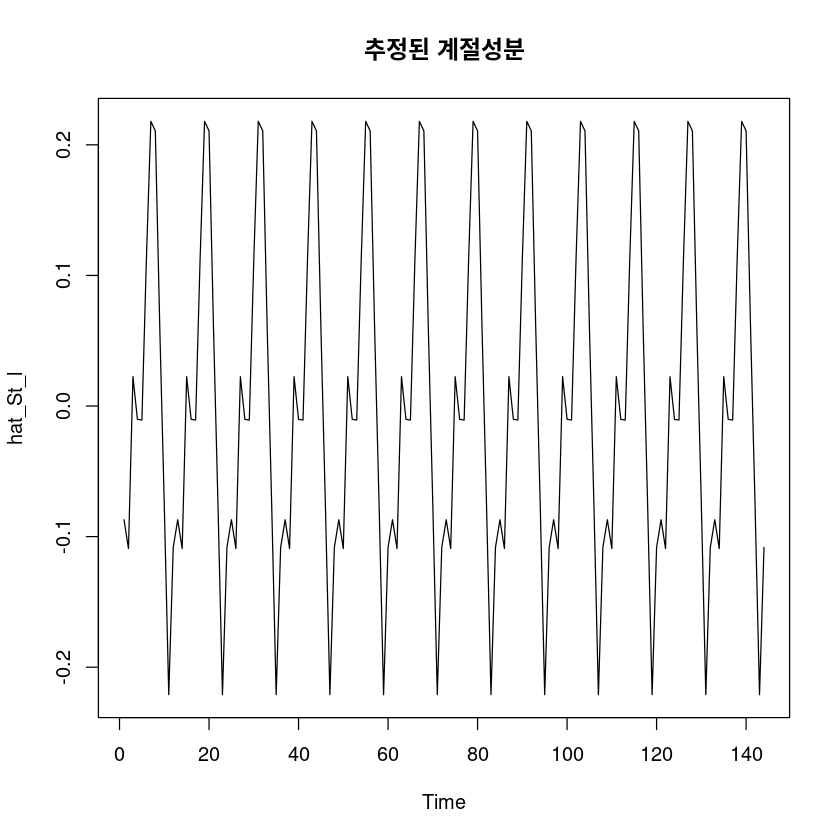

In [280]:
hat_St_l <- fitted(fit456)
ts.plot(hat_St_l, main="추정된 계절성분")

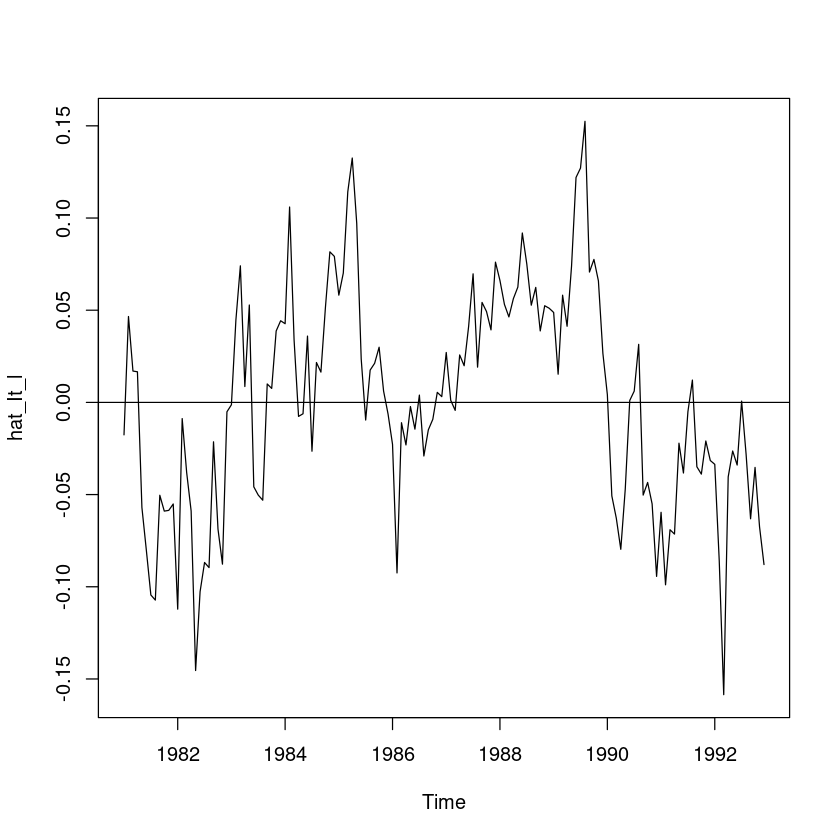

In [282]:
hat_It_l <- usapass_l - hat_Tt_l - hat_St_l
ts.plot(hat_It_l); abline(h=0)

`-` 추정

In [287]:
pred_a_l <- hat_Tt_l + hat_St_l


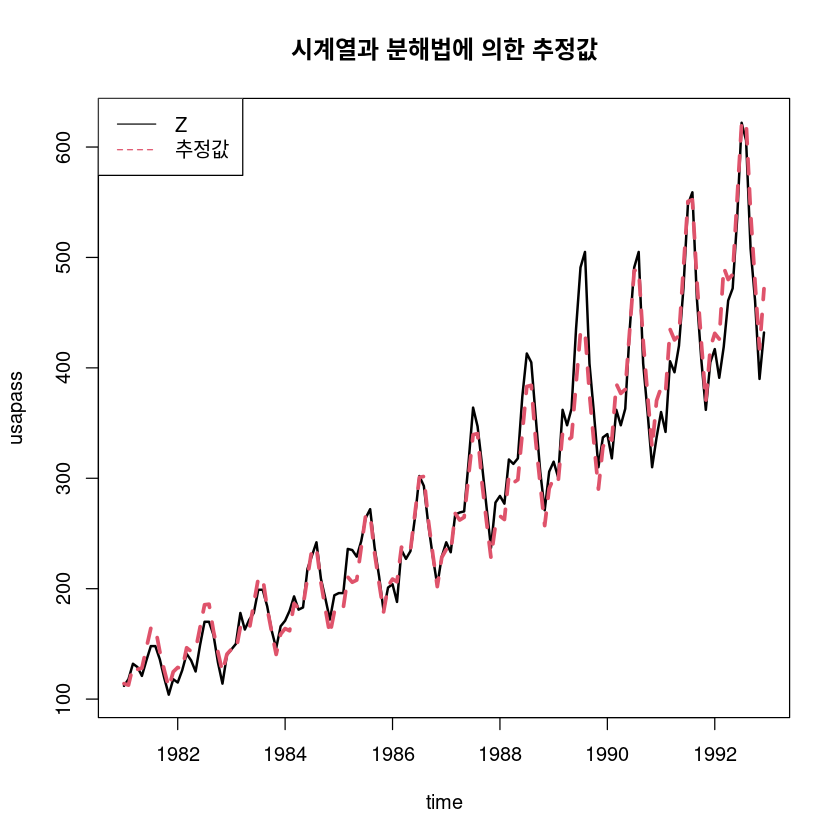

In [289]:
ts.plot(usapass, exp(pred_a_l), col=1:2, lty=1:2, lwd=2:3,ylab="usapass", xlab="time",
     main="시계열과 분해법에 의한 추정값")
legend("topleft", lty=1:2, col=1:2, c("Z", "추정값"))

### 추세를 이용한 분해법(승법)

In [187]:
## 추세성분 추정
fit5 <- lm(usapass ~ t ) 
summary(fit5)


Call:
lm(formula = usapass ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.238 -31.381  -6.677  24.113 163.347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.41968    7.91971   11.04   <2e-16 ***
t            2.67074    0.09477   28.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.27 on 142 degrees of freedom
Multiple R-squared:  0.8483,	Adjusted R-squared:  0.8473 
F-statistic: 794.3 on 1 and 142 DF,  p-value: < 2.2e-16


- $\hat T_t = 87.41968 + 2.67074t$

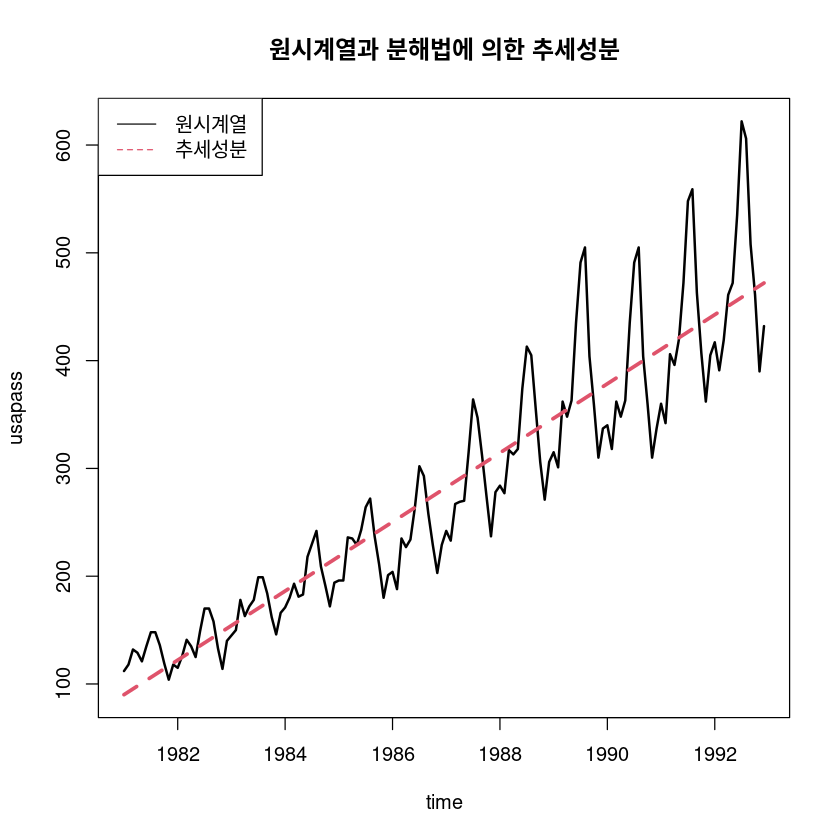

In [188]:
ts.plot(usapass, fitted(fit5) , col=1:2, lty=1:2, lwd=2:3, ylab="usapass", xlab="time",
 main="원시계열과 분해법에 의한 추세성분")
legend("topleft", lty=1:2, col=1:2, c("원시계열", "추세성분"))

In [189]:
fit5_ <- lm(usapass ~ t + I(t^2)) 
summary(fit5_)


Call:
lm(formula = usapass ~ t + I(t^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-101.286  -27.201   -7.821   20.791  145.107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.113e+02  1.172e+01   9.494  < 2e-16 ***
t           1.689e+00  3.733e-01   4.525 1.27e-05 ***
I(t^2)      6.770e-03  2.494e-03   2.715  0.00746 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.25 on 141 degrees of freedom
Multiple R-squared:  0.8559,	Adjusted R-squared:  0.8538 
F-statistic: 418.6 on 2 and 141 DF,  p-value: < 2.2e-16


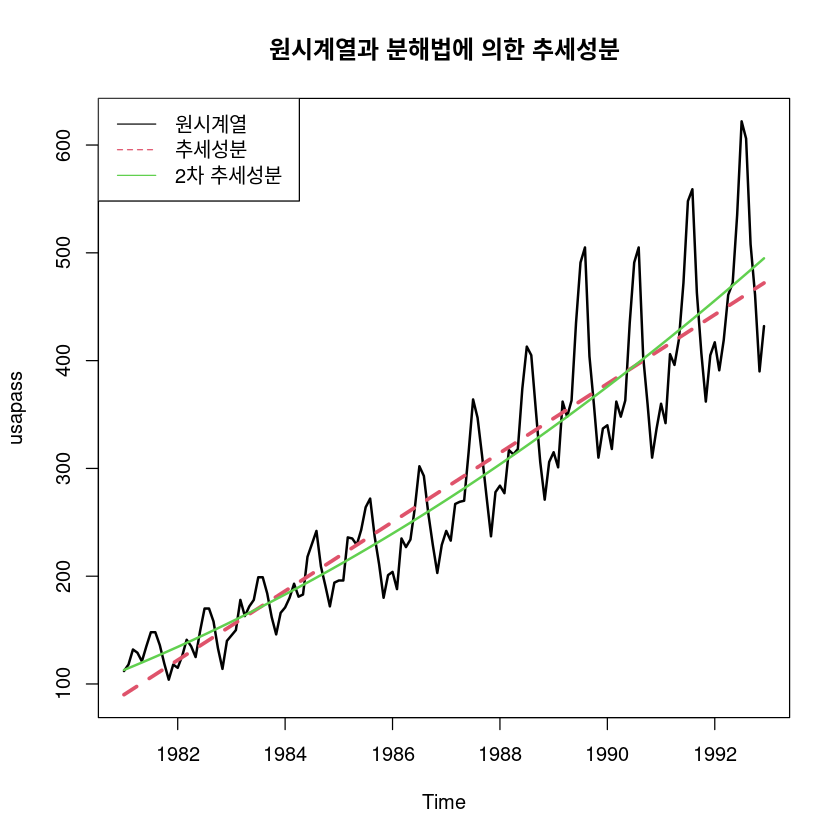

In [190]:
ts.plot(usapass, fitted(fit5), fitted(fit5_), col=1:3, lty=1:2, lwd=2:3, ylab="usapass",
 main="원시계열과 분해법에 의한 추세성분")
legend("topleft", lty=1:2, col=1:3, c("원시계열", "추세성분", "2차 추세성분"))

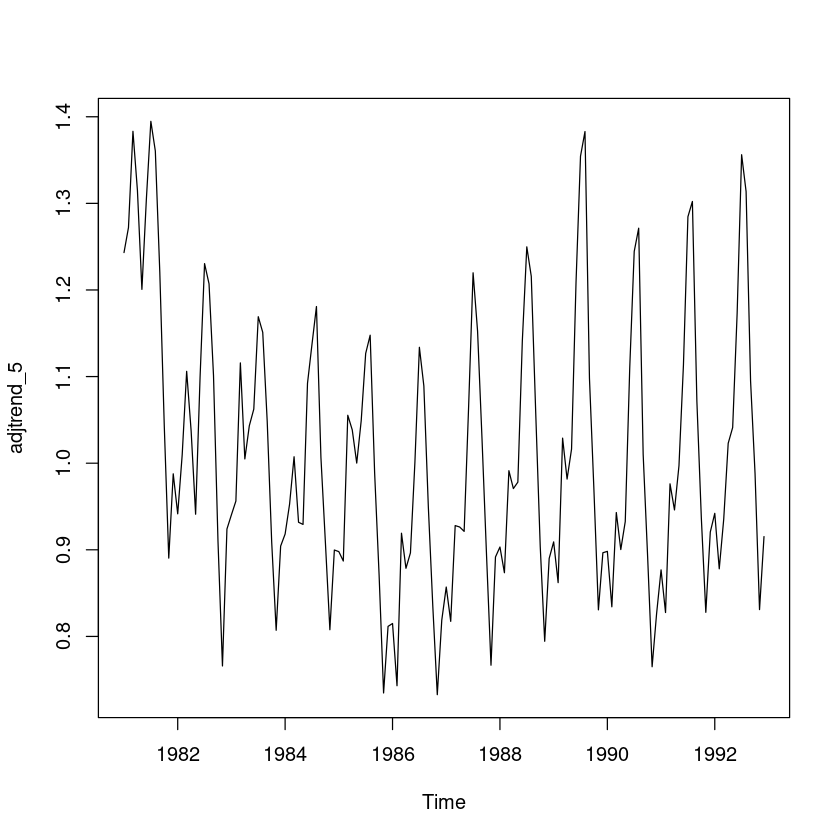

In [191]:
## 원시계열에서 추세성분 조정
trend_5 = fitted(fit5)  # 1차 추세모형
adjtrend_5 = usapass/trend_5
plot.ts(adjtrend_5)

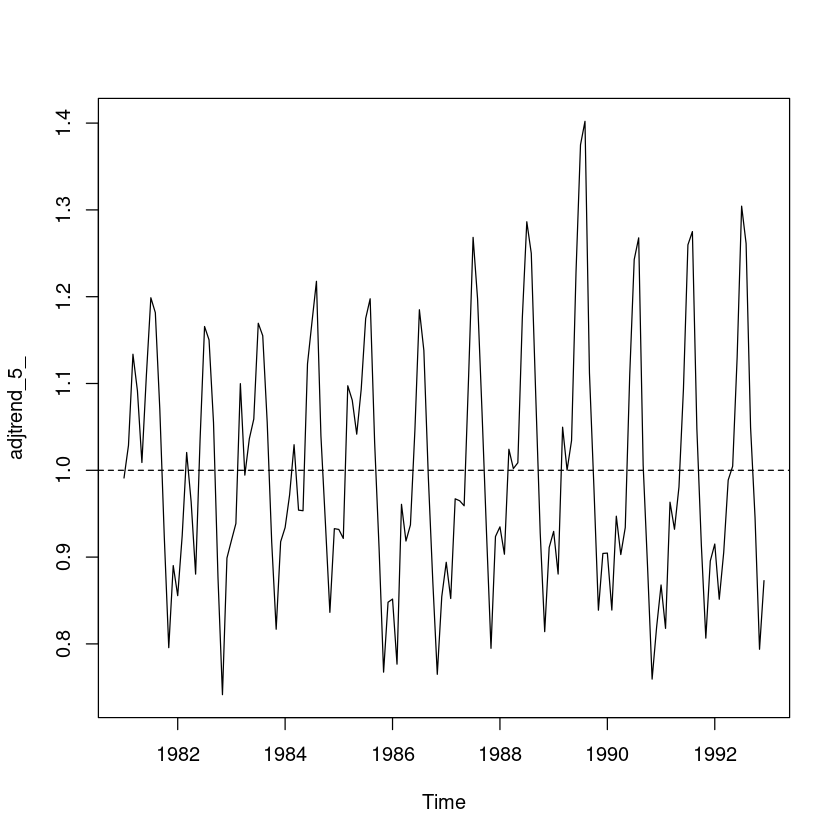

In [193]:
## 원시계열에서 2차 추세성분 조정
trend_5_ = fitted(fit5_)  # 2차 추세모형
adjtrend_5_ = usapass/trend_5_
plot.ts(adjtrend_5_)
abline(h=1, lty=2)

In [194]:
## 지시함수를 이용한 계절성분 추정
y = factor(cycle(adjtrend_5_)) 
fit55 <- lm(adjtrend_5_ ~ 0+y)
summary(fit55)


Call:
lm(formula = adjtrend_5_ ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.115502 -0.040795  0.001315  0.026514  0.177535 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   0.91079    0.01538   59.22   <2e-16 ***
y2   0.89219    0.01538   58.01   <2e-16 ***
y3   1.01655    0.01538   66.10   <2e-16 ***
y4   0.98286    0.01538   63.91   <2e-16 ***
y5   0.98163    0.01538   63.83   <2e-16 ***
y6   1.10939    0.01538   72.13   <2e-16 ***
y7   1.23340    0.01538   80.20   <2e-16 ***
y8   1.22448    0.01538   79.62   <2e-16 ***
y9   1.05099    0.01538   68.34   <2e-16 ***
y10  0.91823    0.01538   59.70   <2e-16 ***
y11  0.79424    0.01538   51.64   <2e-16 ***
y12  0.88904    0.01538   57.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05328 on 132 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9972 
F-statistic:  4301 on 12 and 132 DF,  p-value: < 2.2e-16


$\hat S_t = 0.91079I_1 + \dots + 0.88904I_{12}$

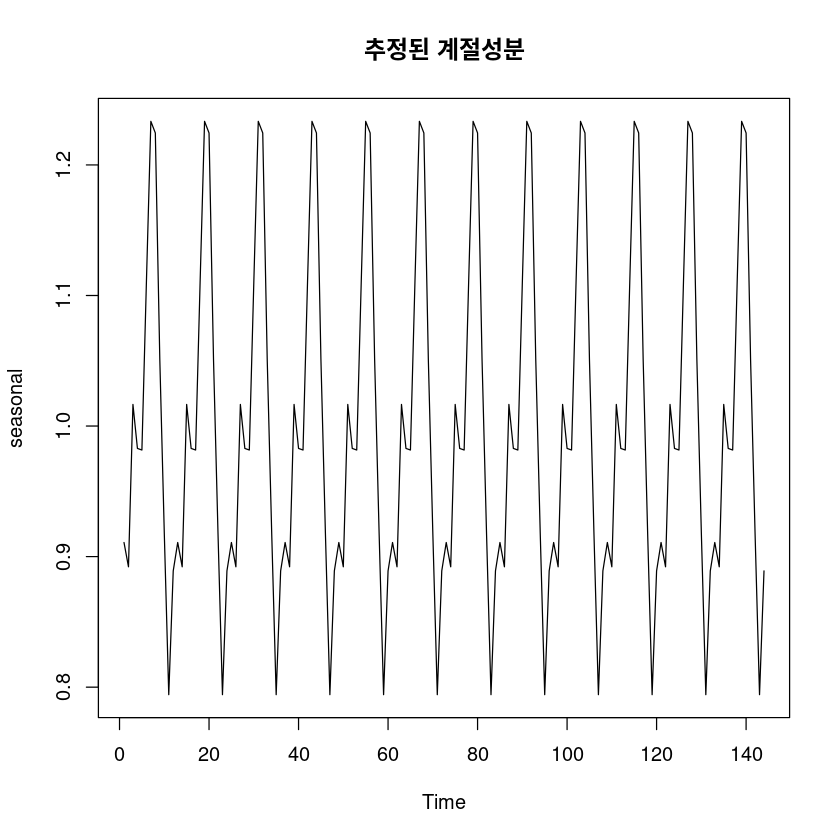

In [197]:
seasonal <- fitted(fit55)
ts.plot(seasonal, main="추정된 계절성분")

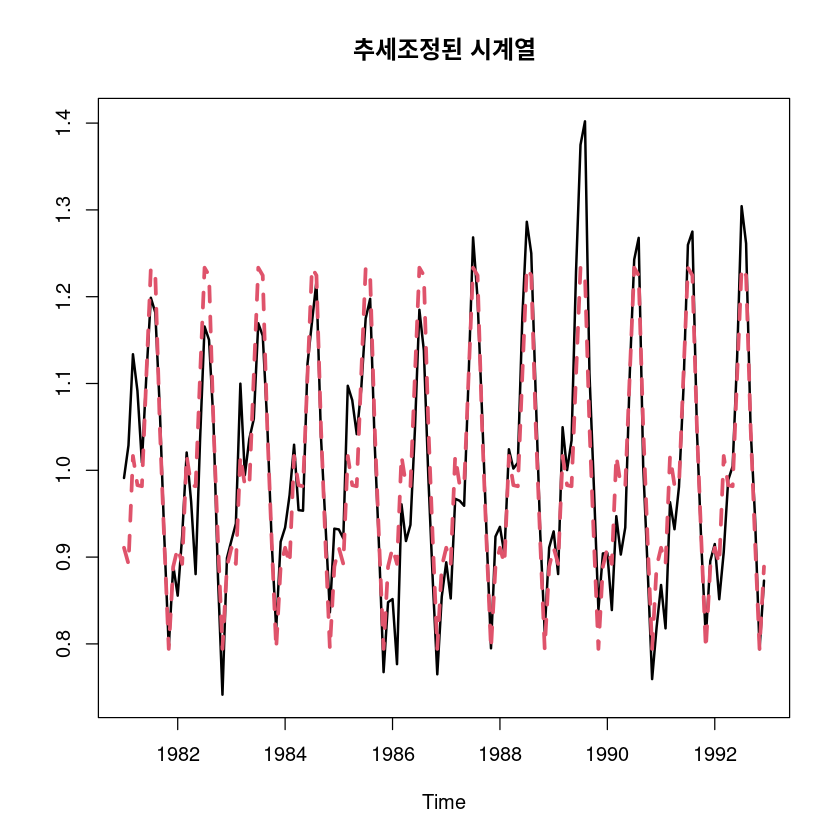

In [198]:
ts.plot(adjtrend_5_, seasonal, col=1:2, lty=1:2, lwd=2:3, main="추세조정된 시계열")

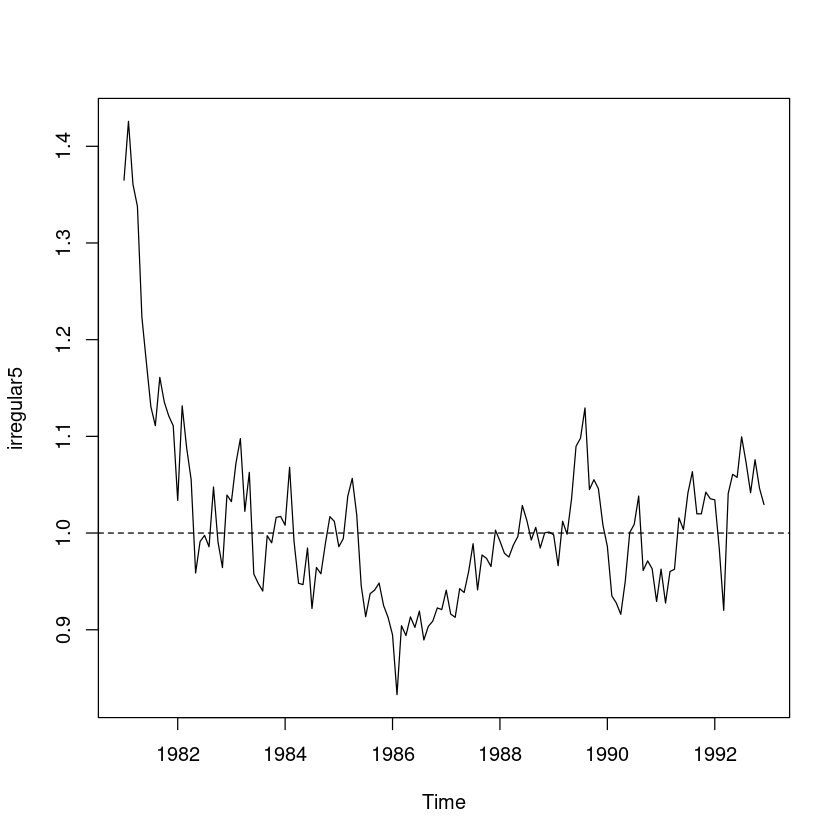

In [199]:
irregular5 <- usapass/trend_5/seasonal

ts.plot(irregular5); abline(h=1, lty=2)

In [200]:
t.test(irregular5, mu=1)


	One Sample t-test

data:  irregular5
t = 1.2411, df = 143, p-value = 0.2166
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.994507 1.024030
sample estimates:
mean of x 
 1.009268 


In [201]:
dwtest(lm(irregular5~ 1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(irregular5 ~ 1)
DW = 0.19413, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


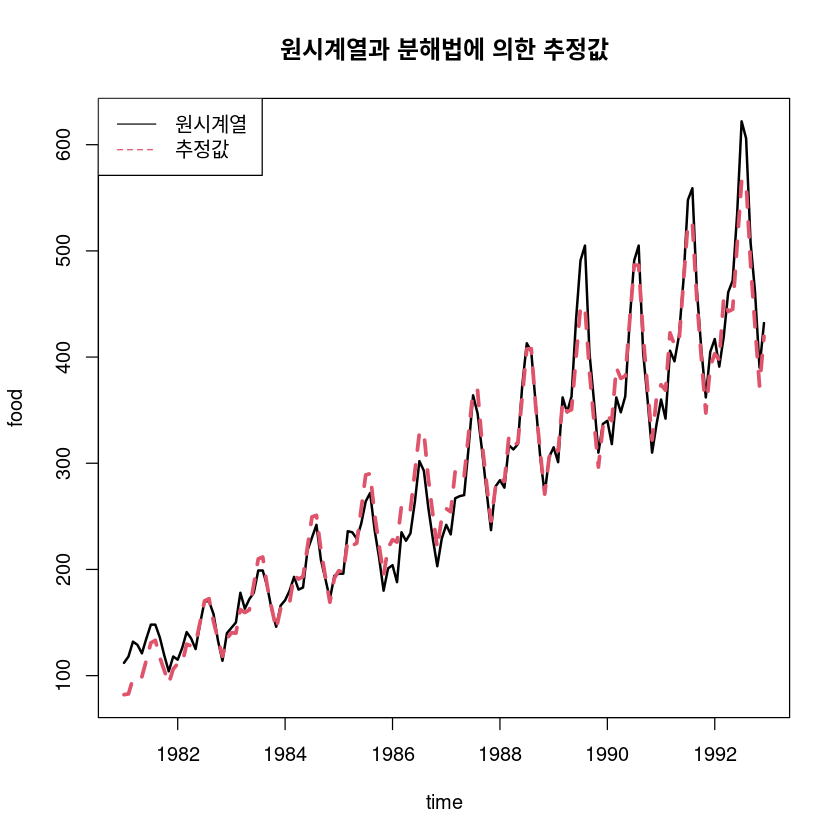

In [202]:
pred_m5 <- trend_5 * seasonal

ts.plot(usapass, pred_m5, col=1:2, lty=1:2, lwd=2:3, ylab="food", xlab="time",
 main="원시계열과 분해법에 의한 추정값")
legend("topleft", lty=1:2, col=1:2, c("원시계열", "추정값"))

## (5) 틀림 ㅠㅠ

 각 분석방법에 의한 결과를 1-시착 후 예측오차의 제곱합 (SSE) 기준하에서 비교하여라.

`-` 추세모형

In [283]:
sum((m3$residuals)^2)

[1] 0.5074598

`-` 평활법

In [285]:
exp(fit_hw_l$SSE)

[1] 1.249133

`-` decompose

In [47]:
sum((usapass_l-pred_dec_)^2, na.rm=T) #SSE - 가법

[1] 0.1615075

`-` stl

In [48]:
sum((usapass_l-pred_stl)^2,na.rm=T)

[1] 0.1017452

`-` 추세를 이용한 분해법(가법)

In [293]:
sum((usapass_l-pred_a_l)^2)

[1] 0.5075556